<a href="https://colab.research.google.com/github/kylefrankel/twitteranalysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Analysis


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from scipy.stats import entropy
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython import display
import networkx as nx
from datetime import date
from collections import Counter
from operator import itemgetter


In [ ]:
df =  pd.read_csv('https://drive.google.com/uc?export=download&id=1ReTRAhHv_IsWv_gE1sm99lfhu-VkEaYU')
df.head(50)


,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image
0,3/15/16,@_Lightscap3s_,Otis,"RT @NatureBridge: ""NatureBridge is Highlight o...",7.100000e+17,RoundTeam,2644,590.0,1,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View
1,3/21/16,@_Lightscap3s_,Otis,RT @NatureBridge: By 2050 we want more fish th...,7.120000e+17,RoundTeam,2641,587.0,2,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View
2,4/6/16,@_Lindsay_Conway,Lindsay,RT @savageducates: Greenest School on #Earth s...,7.180000e+17,Twitter for iPhone,164,318.0,2,0,No,6/7/14,"Bratislava, Slovakia",International education. SEN interests. Adopti...,View
3,3/23/16,@_mcisneros19,Mirella Cisneros,A1: For math children could measure trunks to ...,7.130000e+17,TweetDeck,8,44.0,0,0,No,2/4/16,NaN,NaN,View
4,3/23/16,@_mcisneros19,Mirella Cisneros,A2: Going outside & letting children find the ...,7.130000e+17,TweetDeck,8,44.0,0,0,No,2/4/16,NaN,NaN,View
5,3/23/16,@_mcisneros19,Mirella Cisneros,A4: It is important to make Ss aware about the...,7.130000e+17,TweetDeck,8,44.0,0,1,No,2/4/16,NaN,NaN,View
6,3/23/16,@_mcisneros19,Mirella Cisneros,A4: Learning how we may contribute to the cont...,7.130000e+17,TweetDeck,8,44.0,0,0,No,2/4/16,NaN,NaN,View
7,3/28/16,@_mcisneros19,Mirella Cisneros,Has technology imprisoned children? Do they kn...,7.150000e+17,Twitter Web Client,10,44.0,0,0,No,2/4/16,NaN,NaN,View
8,3/31/16,@_mcisneros19,Mirella Cisneros,Some helpful tips and activities for teaching ...,7.160000e+17,Twitter Web Client,11,44.0,0,0,No,2/4/16,NaN,NaN,View
9,4/7/16,@_mcisneros19,Mirella Cisneros,"""...school isn't supposed to be a polite form ...",7.180000e+17,Twitter Web Client,9,44.0,0,0,No,2/4/16,NaN,NaN,View


In [ ]:
df.dtypes

Date              object
Screen Name       object
Full Name         object
Tweet Text        object
Tweet ID         float64
App               object
Followers          int64
Follows          float64
Retweets           int64
Favorites          int64
Verfied           object
User Since        object
Location          object
Bio               object
Profile Image     object
dtype: object

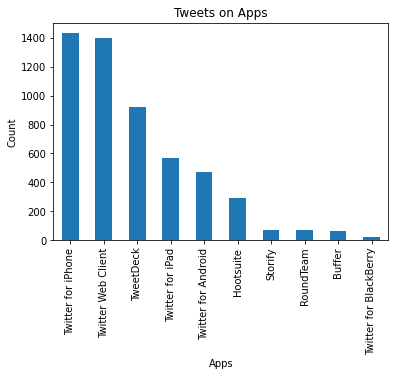

In [ ]:
#2a
df['App'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Apps')
plt.ylabel('Count')
plt.title('Tweets on Apps')
plt.show()

#2a cont. It makes complete sense that Twitter for iPhone is the most used out of all the apps, since a lot of people own Iphones. The Twitter Web Client must be the browser version for Twitter, so it makes sense to be up there at well. There is a big dropoff between the rest, and was suprised that twitter for blackberry was one of the top options since blackbery's have not been in existence for a long time. I was also suprising that twitter for ipad is popular than twitter for android given the large amount of android users worldwide. This graph shows that apple products are a popular option when using Twitter.

In [ ]:
df=df.rename(columns={'Tweet Text':'tweet_text'})
df
ret = df.tweet_text.str.startswith('RT @')
ret

0        True
1        True
2        True
3       False
4       False
        ...  
5509     True
5510     True
5511     True
5512    False
5513    False
Name: tweet_text, Length: 5514, dtype: bool

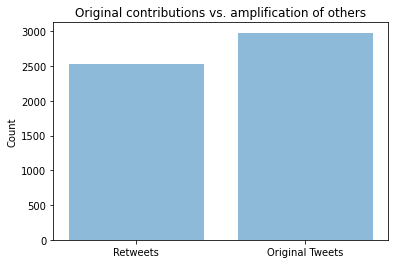

In [ ]:
#2b
true = sum(ret)
false = ret.count() - true
objects = ('Retweets', "Original Tweets")
y_pos = np.arange(len(objects))
count = (true,false)
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Original contributions vs. amplification of others')

plt.show()

#2b cont. There are more original tweets than retweets, however it is surprising how close it is not by a big margin as expected.

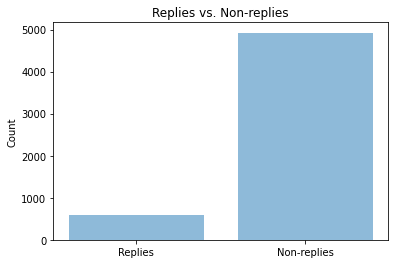

In [ ]:
#2c
reply = df.tweet_text.str.startswith('@')
true = sum(reply)
false = reply.count() - true
objects = ('Replies', "Non-replies")
y_pos = np.arange(len(objects))
count = (true,false)
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title("Replies vs. Non-replies")

plt.show()

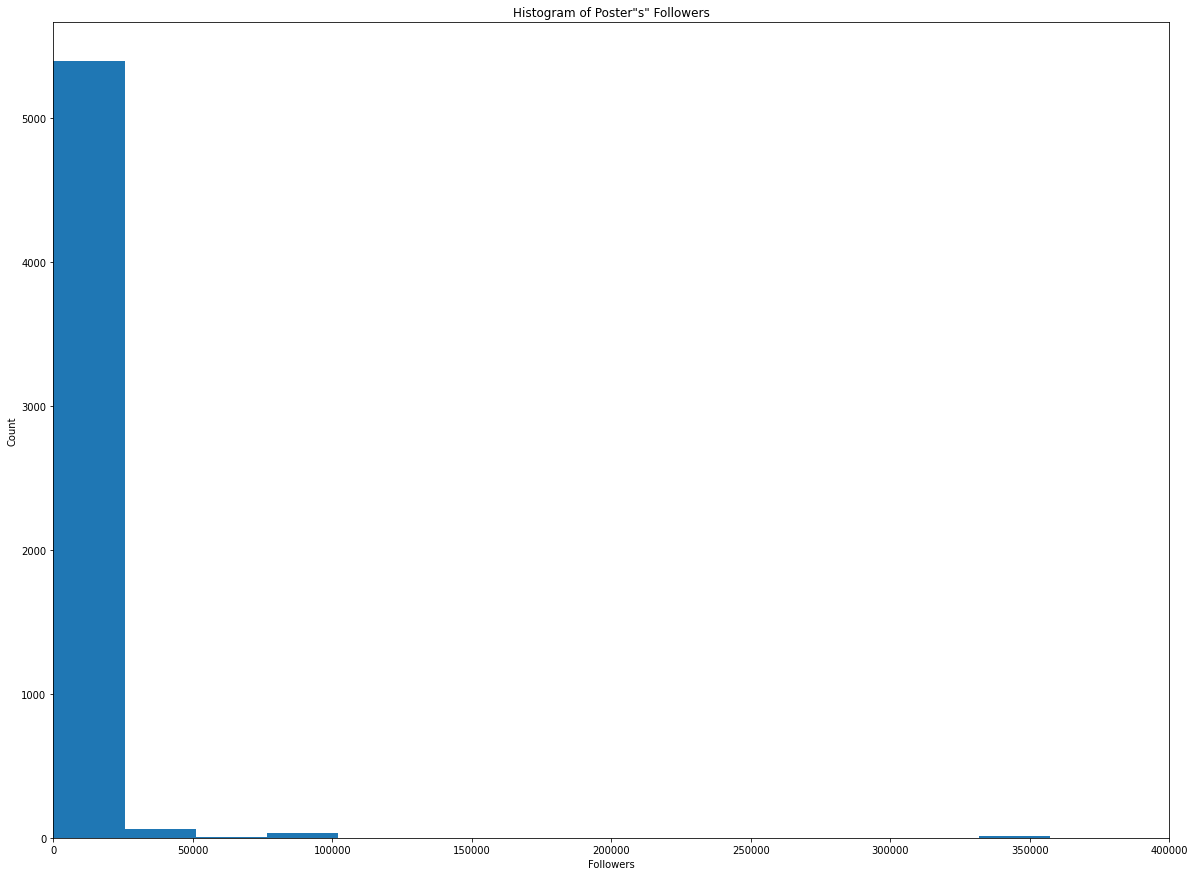

In [ ]:
#2d
plt.figure(figsize=(20, 15))
plt.hist(df.Followers,bins=30)
plt.xlim([0, 400000])
plt.xlabel('Followers')
plt.ylabel('Count')
plt.title('Histogram of Poster"s" Followers')
plt.show()

#2d cont. Most people have between 0 and 50000 followers, so it makes sense that the distribution is almost 100% on the left side. There are outliers who have many more followers. 

In [ ]:
average_followers = df.Followers.mean()
print(average_followers)
average_following = df.Follows.mean()
print(average_following)
both = (average_followers, average_following)
print(both)


3841.1418208197315
1304.5603119898421
(3841.1418208197315, 1304.5603119898421)


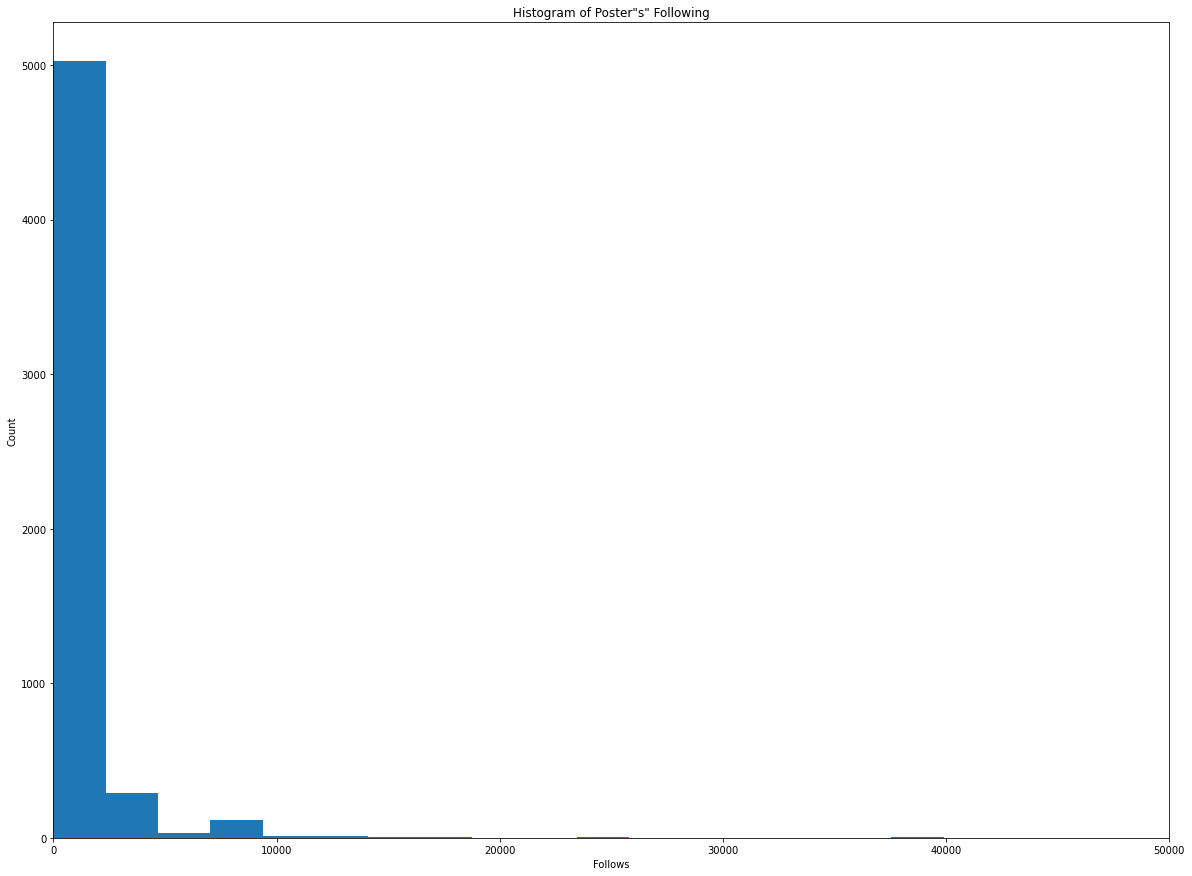

In [ ]:
#2e
plt.figure(figsize=(20, 15))
plt.hist(df.Follows,bins=30)
plt.xlim([0, 50000])
plt.xlabel('Follows')
plt.ylabel('Count')
plt.title('Histogram of Poster"s" Following')
plt.show()

#2e cont. Most people follow more people than who follow them, which is very popular on Twitter. Also, most people tend to follow closer to 2500 and not so much more than that. Also outlier for the followers sections could be very high numbers, while nobody follows that many people. 

In [ ]:
#2f
df.groupby('Location')
top25GEO = df.groupby("Location")["tweet_text"].count().sort_values(ascending=False)
top25GEO.head(25)

Location
Caledon, Ontario                  592
Dundas Valley, NSW                187
Springbrook Public School         184
Ontario, Canada                   163
EveningShadowofCanadianRockies    142
New South Wales, Australia        126
Canada                            119
Virginia Beach, VA                112
Kurrajong Heights, near Sydney    110
PDSB                               81
Washington DC                      78
Grand Haven Michigan               60
Calgary, Alberta.                  60
Boston, MA                         59
Alberta, Canada                    59
Australia                          57
Durham NC                          54
Ontario                            53
Sydney                             52
Bainbridge Island, WA              49
Sackville North, NSW Australia     49
Mississauga, Ontario, Canada       45
Elon, NC                           44
Toronto                            38
Ottawa, Ontario                    37
Name: tweet_text, dtype: int64

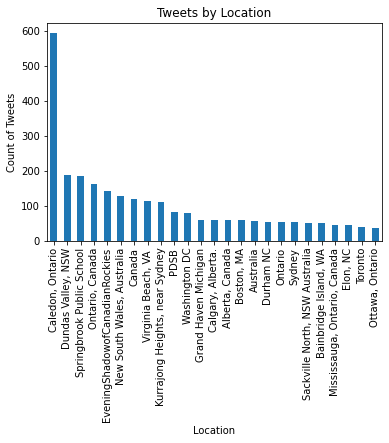

In [ ]:
#2f part 1
df['Location'].value_counts()[:25].plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count of Tweets')
plt.title('Tweets by Location')
plt.show()

In [ ]:
#2f part 2
no_dups = df.drop_duplicates(subset=['Screen Name'])
no_dups.groupby('Location')
top25Users = no_dups.groupby("Location")["tweet_text"].count().sort_values(ascending=False)
top25Users.head(25)


Location
Canada                  26
Ontario, Canada         21
Toronto                 16
Toronto, Ontario        11
Washington, DC          10
Seattle, WA             10
Mississauga, Ontario    10
USA                      8
Toronto, Canada          8
Australia                8
Ontario                  7
Calgary, AB              7
United States            7
Brampton, Ontario        7
London, Ontario          7
Calgary                  6
PDSB                     6
California               6
New York, NY             6
Sydney, Australia        6
Sydney                   6
Edmonton, Alberta        6
Singapore                5
Vancouver, BC            5
Los Angeles, CA          5
Name: tweet_text, dtype: int64

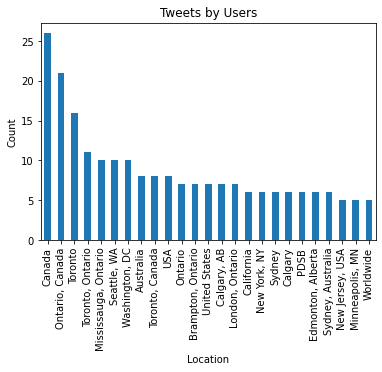

In [ ]:
#2f part 2
no_dups['Location'].value_counts()[:25].plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Tweets by Users')
plt.show()

In [ ]:
df['Date'] =  pd.to_datetime(df['Date'], format='%m/%d/%y')
df.Date

0      2016-03-15
1      2016-03-21
2      2016-04-06
3      2016-03-23
4      2016-03-23
          ...    
5509   2016-03-16
5510   2016-05-21
5511   2016-03-22
5512   2016-03-17
5513   2016-03-29
Name: Date, Length: 5514, dtype: datetime64[ns]

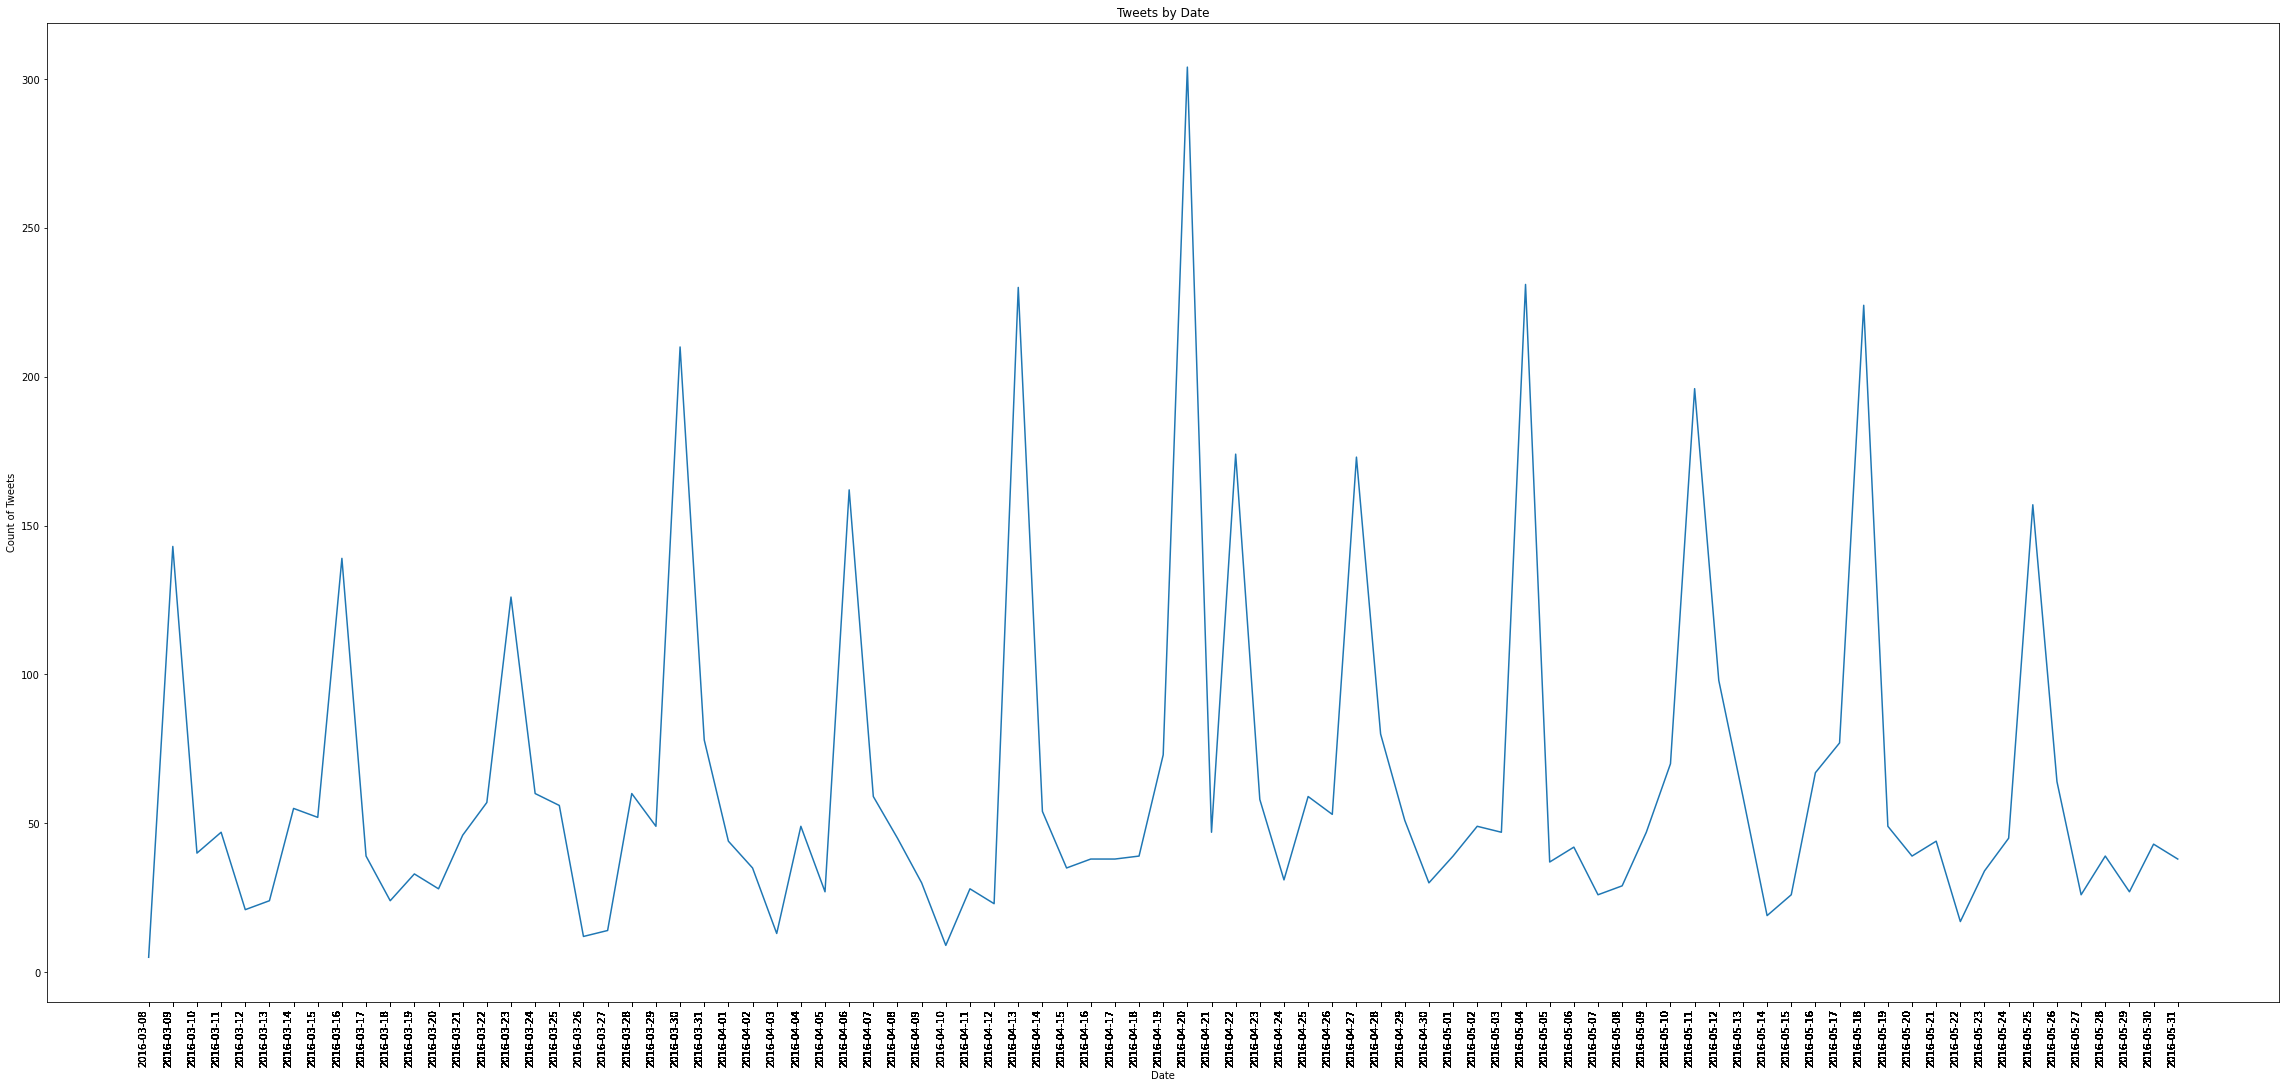

In [ ]:
#2gi
plt.figure(figsize=(40,20))
df['Date'].value_counts().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.title('Tweets by Date')
plt.xticks(df.Date, rotation='vertical')
plt.show()

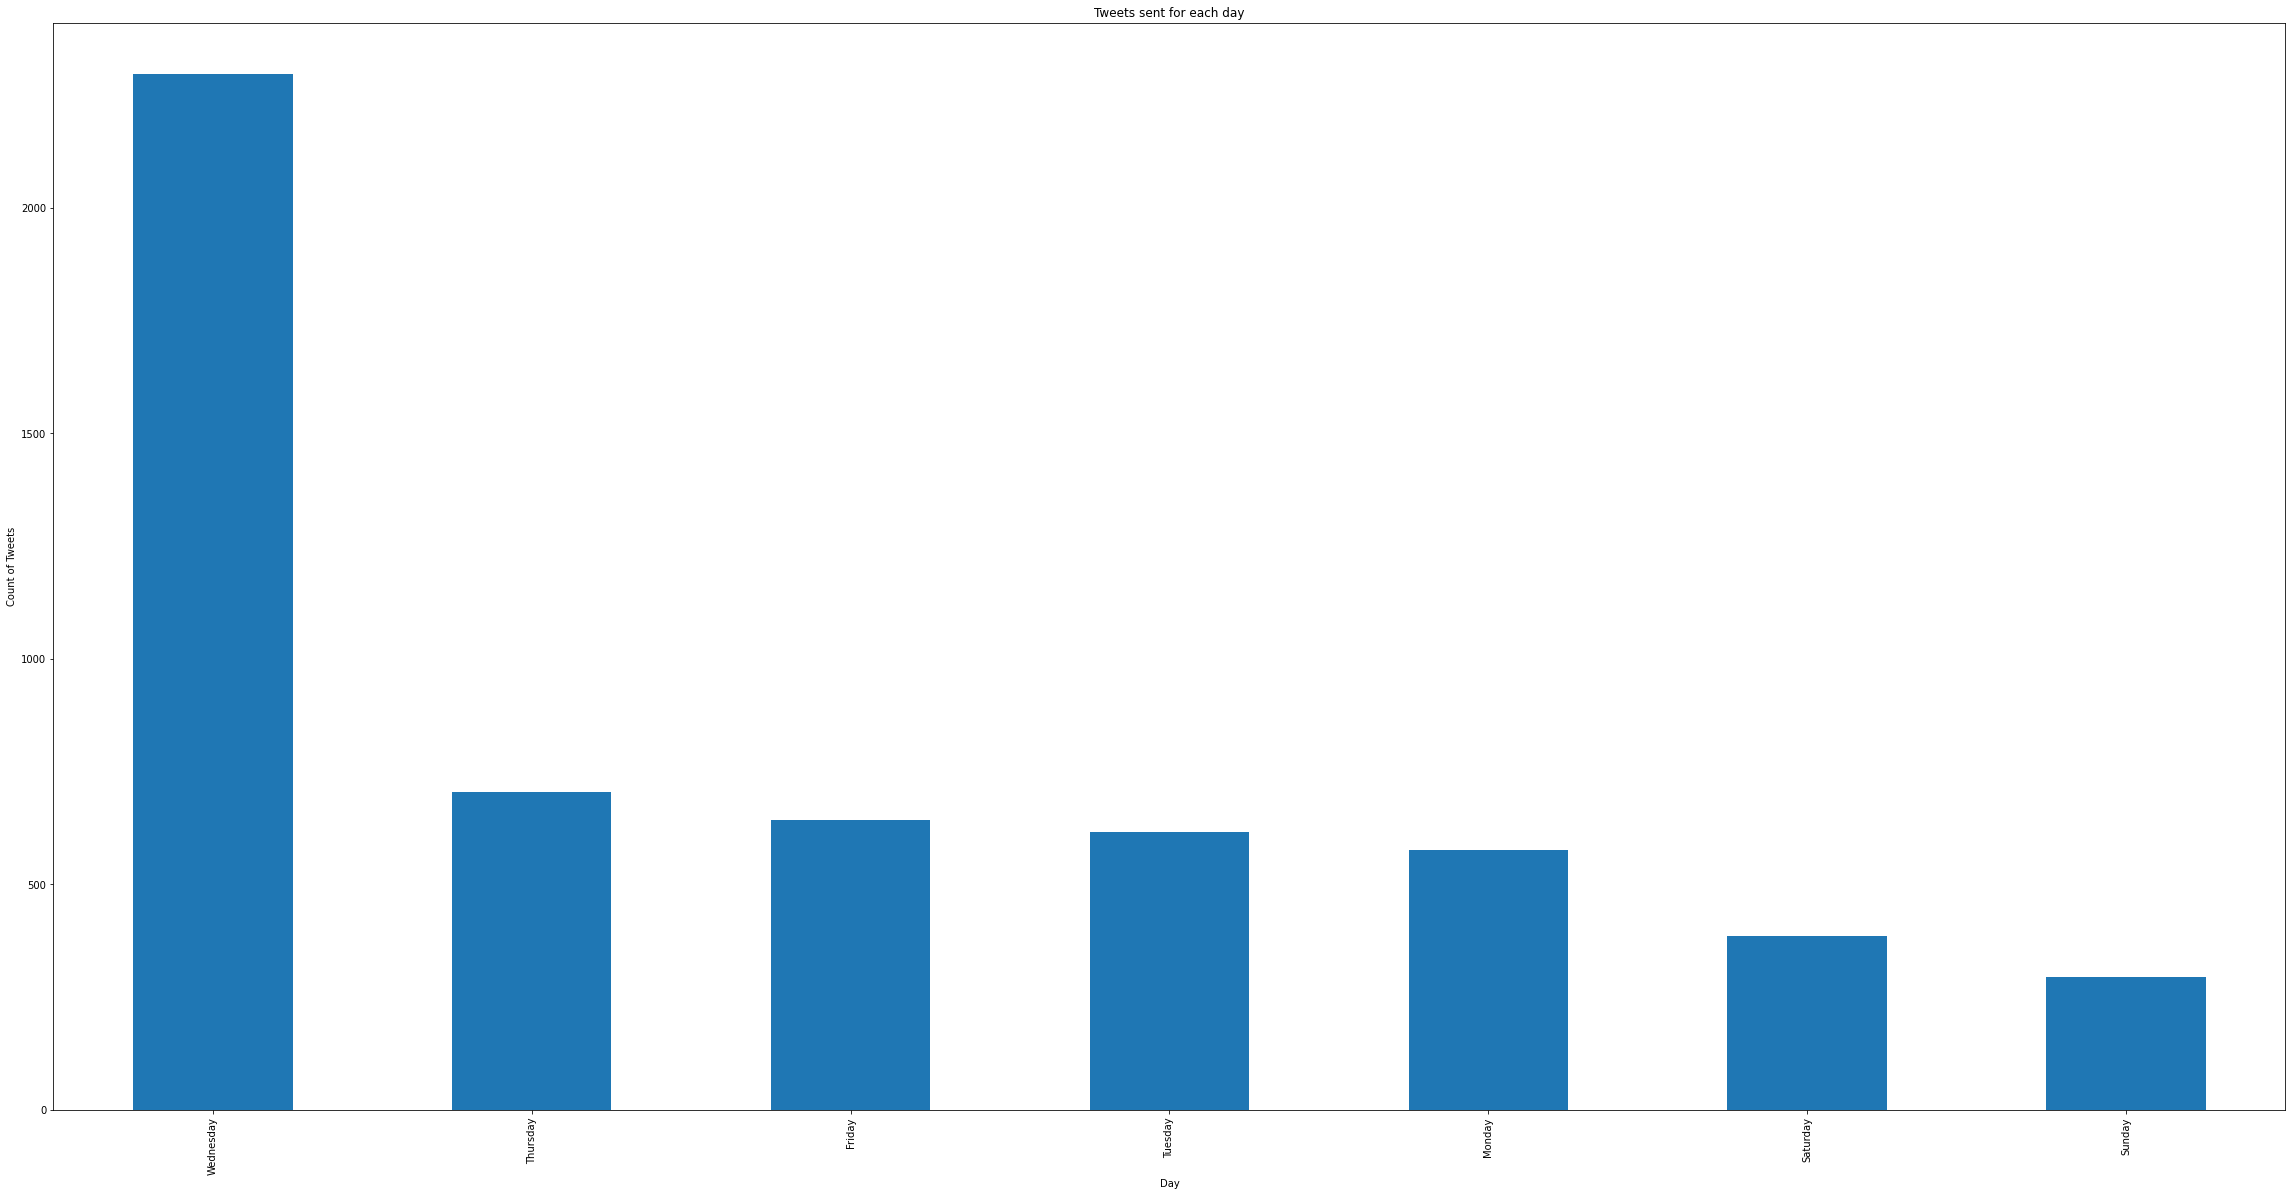

In [ ]:
#2gii
from calendar import day_name
df4=df['weekday'] = df['Date'].dt.day_name()
df4
plt.figure(figsize=(40,20))
df['weekday'].value_counts().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count of Tweets')
plt.title('Tweets sent for each day')
plt.show()

(5514, 8731)
['00', '000', '0192av9i7z', '01ai6yvl', '01ai6yvlft', '02nb5hbfcm', '03', '04', '05', '06', '07c2rka1po', '09', '0ajbweg1ld', '0bnjoa6xvo', '0cseubupmx', '0d4td9fhwp', '0dfqscseei', '0eeomxqarx', '0ercf876wx', '0f3bawbdwf', '0g0bsaxmqy', '0h8fk5fvur', '0hjegqbdq9', '0i1c9egxif', '0iat8ym', '0iat8ymsvi', '0jlffqg0te', '0jn6mc', '0jn6mc7ygl', '0kiyz83zs8', '0krgrvlxau', '0llpcyde8d', '0lx0mfywzj', '0nbtp3n9zq', '0ur03pvciz', '0urpbyfg1p', '0wr0l2kd8h', '0wr5retkrq', '0x2ccryno1', '0xwshpscvz', '0y5ioobqrg', '0yckyj0ugz', '0yyqqscezx', '0yzp6ltryr', '0zcwbpxhll', '10', '100', '100yo', '100yrs', '10dmeqi5kb', '10pm', '10th', '11', '11am', '11th', '12', '1230', '12ig1zcoxe', '12th', '13', '1390', '13th', '14', '145', '14ggpa7q83', '14u242rqs7', '15', '15min', '15w60somls', '16', '165', '16eiawards', '16th', '17', '17th', '18', '1850', '18th', '19', '1970', '19th', '1aooua2mv9', '1c4badhzl1', '1dr2eolpdp', '1fr0qiiosv', '1gj6z3glwg', '1hnfctn1wf', '1hr', '1ismvkqve1', '1kqqf1wbh

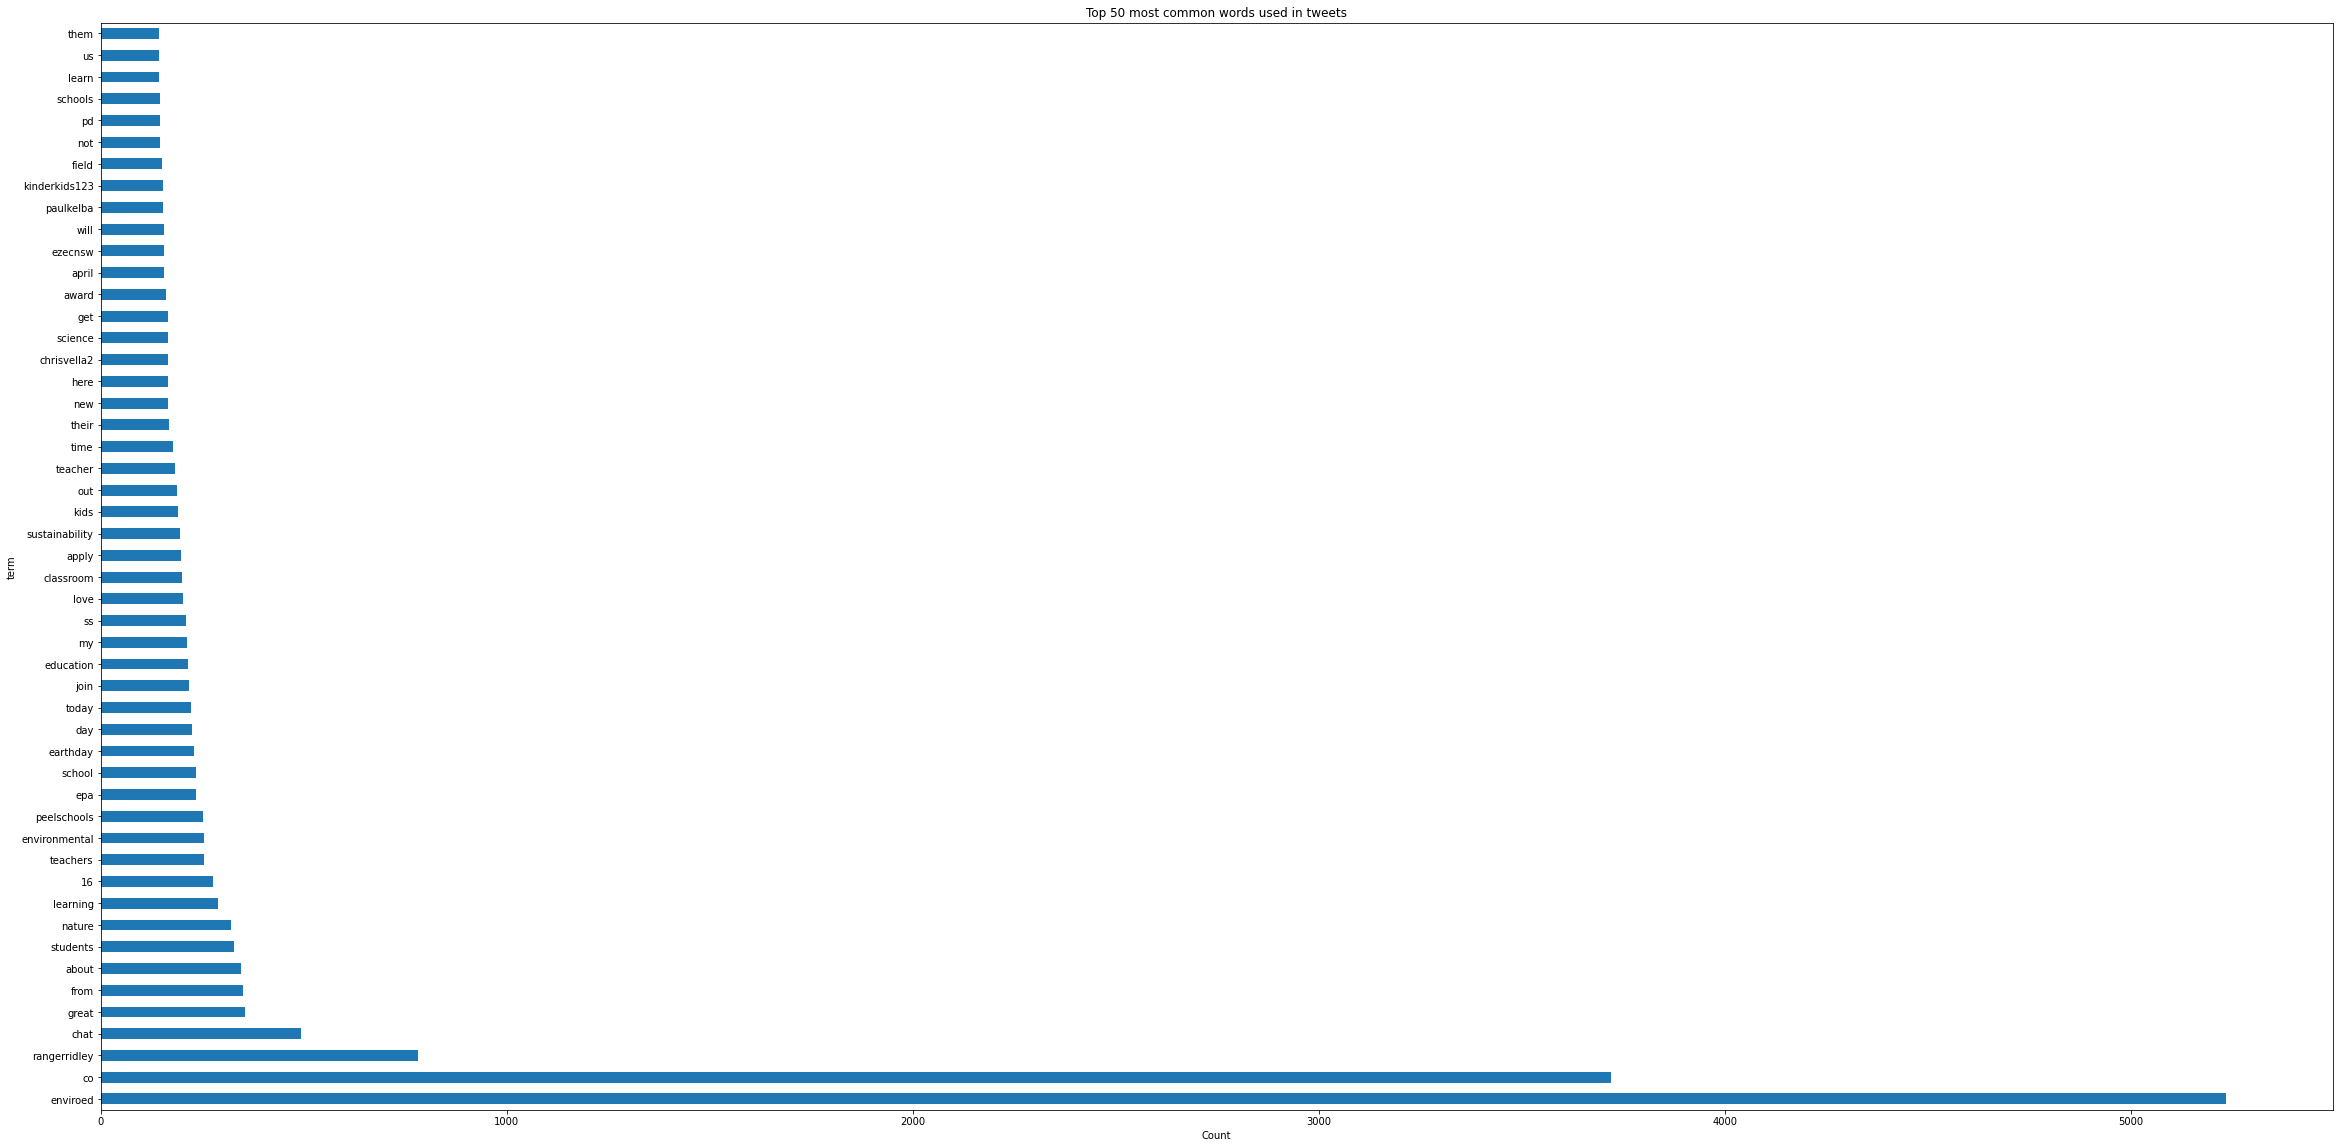

In [ ]:
#2h part 1 
stop_list = ['a', 'an', 'the', 'it', 'is', 'i', 'and', 'or', 'am', 'are', 'of', 'on', 'to', 'but', 'be', 'that', 'with','so', 
             'in', 'on', 'because', 'believe', 'but', 'find', 'is', 'like', 'and', 'think', "been","for","rt","https","our",
             "we","you","this","your","at","have","may","more","how","what","can","all","by","they","as","do"]
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list)
data_counts = count_vect.fit_transform(df['tweet_text'])
print(data_counts.shape)
print(count_vect.get_feature_names())
data_counts.todense()
x = count_vect.get_feature_names()
y = np.array(data_counts.todense()).sum(axis=0)
df5 = pd.DataFrame()
df5['term'] = x
df5['count'] = y
df5 = df5.sort_values(by='count',ascending=False)
x=df5.head(50)
x.plot(y='count', x='term', kind='barh', legend=None,figsize=(40,20))
plt.xlabel('Count')
plt.title('Top 50 most common words used in tweets')
plt.show()



In [ ]:
#2h part 2
df_hashtags= pd.DataFrame()
df_hashtags['fulltext'] = df.tweet_text
df_hashtags['hashtags'] = df_hashtags.fulltext.str.findall(r'#.*?(?=\s|$)')
df_hashtags['liststring'] = [','.join(map(str, l)) for l in df_hashtags['hashtags']]
df_hashtags






,fulltext,hashtags,liststring
0,"RT @NatureBridge: ""NatureBridge is Highlight o...",[#EnviroEd],#EnviroEd
1,RT @NatureBridge: By 2050 we want more fish th...,"[#ocean., #enviroed., #…]","#ocean.,#enviroed.,#…"
2,RT @savageducates: Greenest School on #Earth s...,"[#Earth, #edchat, #EnviroEd, #environment]","#Earth,#edchat,#EnviroEd,#environment"
3,A1: For math children could measure trunks to ...,[#EnviroEd],#EnviroEd
4,A2: Going outside & letting children find the ...,[#EnviroEd],#EnviroEd
...,...,...,...
5509,RT @RangerRidley: Today mind was reopened when...,"[#SugarBush, #EnviroEd]","#SugarBush,#EnviroEd"
5510,RT @AAPremlall: Native #Bees of Eastern North ...,"[#Bees, #nativebees, #wildlife, #pollinators, ...","#Bees,#nativebees,#wildlife,#pollinators,#ecos..."
5511,RT @EPAregion2: K-12 educators using innovativ...,[#EnviroEd],#EnviroEd
5512,#schoolgardens can make great outdoor classroo...,"[#schoolgardens, #EnviroEd]","#schoolgardens,#EnviroEd"


(5514, 1008)
['12', '16eiawards', '1to1techat', '2015fpa', '2016unconference', '2ndchat', '30x30challenge', '3rdchat', '7thchat', '8ways', 'aaee', 'abed', 'abenviro', 'abjobs', 'ableg', 'abndp', 'aboriginal', 'abpoli', 'academehs', 'access', 'accreditation', 'acee', 'action', 'activism', 'activities', 'adaptation', 'addisababa', 'adechat', 'adedu', 'advocacy', 'aee530', 'aera16', 'aera2016', 'aesthetics', 'afterschool', 'afterschoolee', 'agbu', 'agedu', 'agricultu', 'agriculture', 'agroforestry', 'air', 'airquality', 'alameda', 'alberta', 'alternat', 'alternativeenergy', 'anim', 'animalbehavior', 'animals', 'animoto', 'apchemchat', 'appinve', 'appinventor', 'appreciatenature', 'apps', 'aquariums', 'arborday', 'arkansasgives', 'armenia', 'armenian', 'art', 'arted', 'ash', 'asksylvia', 'astronomy', 'atchat', 'aussieed', 'awareness', 'banplasticstraws', 'based', 'basil', 'bc', 'bced', 'bcedchat', 'bclearns', 'bcpoli', 'beauty', 'beef', 'beekeeping', 'bees', 'belize', 'bellingham', 'bewell

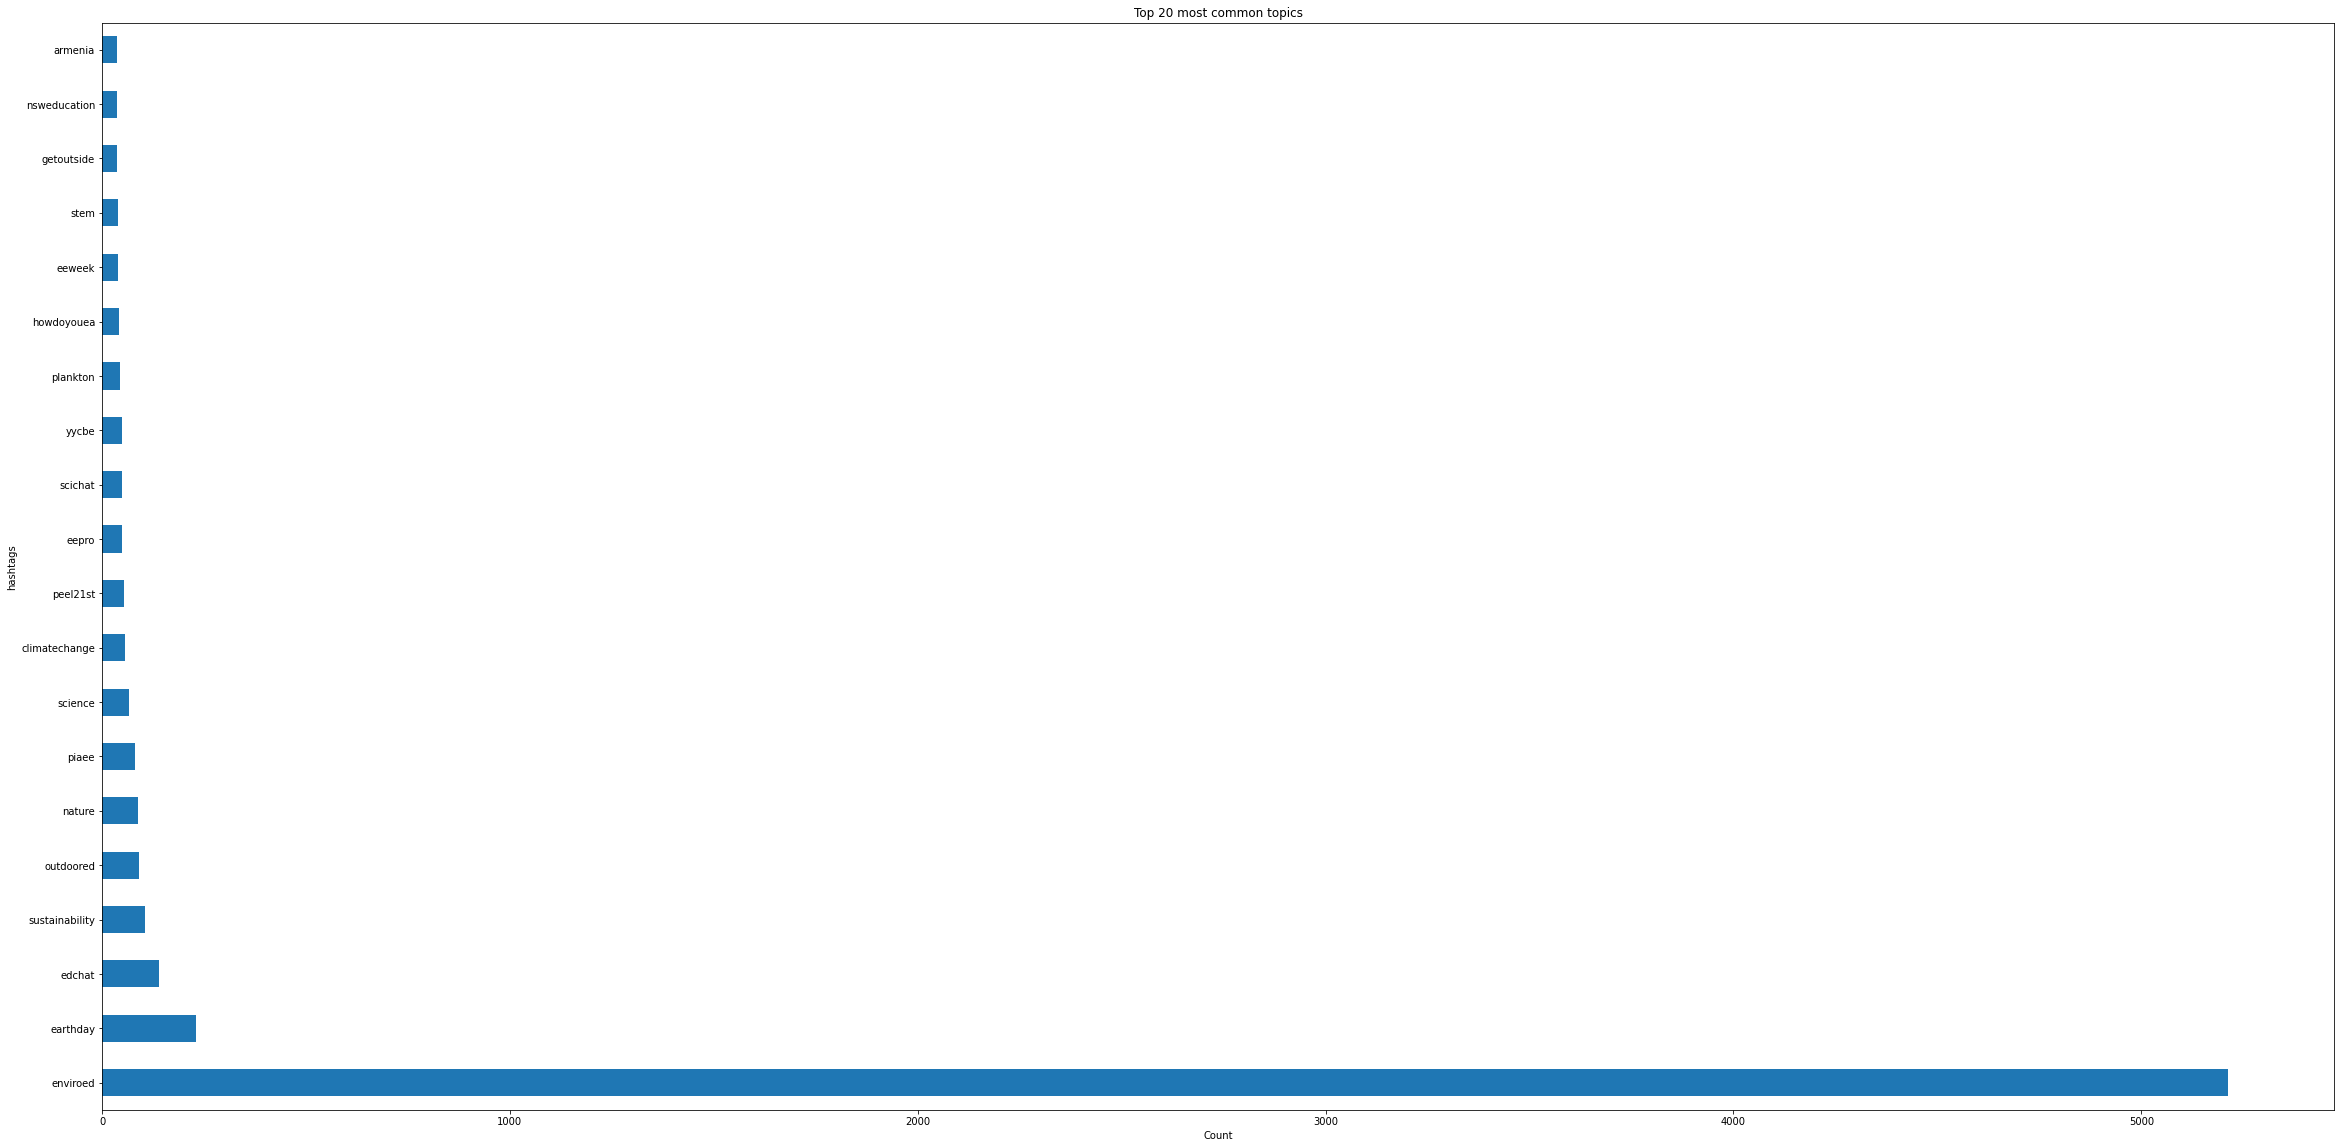

In [ ]:
count_vect1 = CountVectorizer(lowercase=True, stop_words=stop_list)
data_counts1 = count_vect1.fit_transform(df_hashtags['liststring'])
print(data_counts1.shape)
print(count_vect1.get_feature_names())
data_counts1.todense()
x = count_vect1.get_feature_names()
y = np.array(data_counts1.todense()).sum(axis=0)
dfHT = pd.DataFrame()
dfHT['hashtags'] = x
dfHT['count'] = y
dfHT = dfHT.sort_values(by='count',ascending=False)
x=dfHT.head(20)
x.plot(y='count', x='hashtags', kind='barh', legend=None,figsize=(40,20))
plt.xlabel('Count')
plt.title('Top 20 most common topics')
plt.show()

#2H Based on the two graphs above, the most common word and also hashtag is enviroed. The biggest theme seems to be around environment topics like nature, earthday, etc. This is consistent with our date graph above, showing tweets spiked near Earthday, which could be a reason for all these tweets.

In [ ]:
#2ii
df=df.rename(columns={'Screen Name':'screen_name'})
nodes= df['screen_name']
nodes

0         @_Lightscap3s_
1         @_Lightscap3s_
2       @_Lindsay_Conway
3          @_mcisneros19
4          @_mcisneros19
              ...       
5509            @ZohrinM
5510        @ZwartblesIE
5511             @zwaste
5512           @zyngaorg
5513     @brianne_yvonne
Name: screen_name, Length: 5514, dtype: object

In [ ]:

edges = []
weight= {}

for index, row in df.iterrows():
  mentioning = row['screen_name']
  if '@' in row['tweet_text']:
   mentions = row['tweet_text']

  for node in nodes:
    if (mentioning) in weight:
      weight[(mentioning)]+=1
    else:
       weight[(mentioning)]=1 
    if node in mentions:
         edges.append((mentioning,node,weight[(mentioning)]))


edges





[('@_Lightscap3s_', '@NatureBridge', 3429),
 ('@_Lightscap3s_', '@NatureBridge', 3430),
 ('@_Lightscap3s_', '@NatureBridge', 3431),
 ('@_Lightscap3s_', '@NatureBridge', 3432),
 ('@_Lightscap3s_', '@NatureBridge', 3433),
 ('@_Lightscap3s_', '@NatureBridge', 3434),
 ('@_Lightscap3s_', '@NatureBridge', 3435),
 ('@_Lightscap3s_', '@NatureBridge', 8943),
 ('@_Lightscap3s_', '@NatureBridge', 8944),
 ('@_Lightscap3s_', '@NatureBridge', 8945),
 ('@_Lightscap3s_', '@NatureBridge', 8946),
 ('@_Lightscap3s_', '@NatureBridge', 8947),
 ('@_Lightscap3s_', '@NatureBridge', 8948),
 ('@_Lightscap3s_', '@NatureBridge', 8949),
 ('@_Lindsay_Conway', '@savageducates', 4708),
 ('@_Lindsay_Conway', '@savageducates', 4709),
 ('@_Lindsay_Conway', '@savageducates', 4710),
 ('@_Lindsay_Conway', '@savageducates', 4711),
 ('@_mcisneros19', '@savageducates', 4708),
 ('@_mcisneros19', '@savageducates', 4709),
 ('@_mcisneros19', '@savageducates', 4710),
 ('@_mcisneros19', '@savageducates', 4711),
 ('@_mcisneros19', '

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(mentioning)
G.add_weighted_edges_from(edges)

In [ ]:
#2iii
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
print("Manual calculation:", G.number_of_edges() / (G.number_of_nodes()*(G.number_of_nodes()-1)))

Name: 
Type: DiGraph
Number of nodes: 1579
Number of edges: 3185
Average in degree:   2.0171
Average out degree:   2.0171
Network density: 0.0012782632636368818
Manual calculation: 0.0012782632636368818


In [ ]:
#2iiii
# It's often helpful to assign attributes to nodes in the network.

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# in_degree only works for directed graphs
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

# out_degree only works for directed graphs
out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
#2iiv
sorted_in_degree_dict = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by in-degree centrality:")
for b in sorted_in_degree_dict[:20]:
    print(b)

sorted_out_degree_dict = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by out-degree centrality:")
for b in sorted_out_degree_dict[:20]:
    print(b)

sorted_betweenness_dict = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by betweenness centrality:")
for b in sorted_betweenness_dict[:20]:
    print(b)

sorted_eigenvector_dict = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by eigenvector centrality:")
for b in sorted_eigenvector_dict[:20]:
    print(b)


Top 20 users ranked by in-degree centrality:
('@RangerRidley', 264)
('@EPA', 186)
('@PeelSchools', 99)
('@EnviroEducators', 75)
('@PaulKelba', 63)
('@KinderKids123', 58)
('@CWF_FCF', 51)
('@PDSB_eco', 50)
('@IslandWood', 49)
('@NAAEEStaff', 44)
('@MindShiftKQED', 42)
('@ChrisVella2', 42)
('@EZECNSW', 42)
('@GEOEC', 41)
('@Sierra_BC', 40)
('@KinderFynes', 40)
('@CreativeSTAR', 40)
('@AlbertaEE', 39)
('@stevenbody', 39)
('@ON_EcoSchools', 39)
Top 20 users ranked by out-degree centrality:
('@RangerRidley', 104)
('@DavidSpencerEdu', 48)
('@PaulKelba', 37)
('@Learn_OnTheFly', 37)
('@EZECNSW', 31)
('@stevenbody', 29)
('@ChrisVella2', 27)
('@KinderKids123', 18)
('@CWF_FCF', 16)
('@doctormorrison', 15)
('@OCSBeco', 14)
('@vivianharris45', 14)
('@WestSydUFood_Ag', 14)
('@amk_elon', 13)
('@PDSB_eco', 13)
('@MikeBartlettEdu', 13)
('@EnviroEducators', 12)
('@KinderFynes', 12)
('@NAAEEStaff', 12)
('@BearTrust', 12)
Top 20 users ranked by betweenness centrality:
('@RangerRidley', 0.08726681399110192

#2iv
The first observation we saw is that Ranger Ridley is top for all the metrics. This means that Ranger is the most important person in this dataset, where they are the person mentioned the most, mention the most, and they are also the best connected and more information passes through their node.


In [ ]:
#2ivi 1st
DM_neighbors = []
DM_neighbors.append('@doctormorrison')

for edge in G.edges():
  if edge[0] == '@doctormorrison':
    DM_neighbors.append(edge[1])
  elif edge[1] == '@doctormorrison':
    DM_neighbors.append(edge[0])

DM_neighbors
H = G.subgraph(DM_neighbors)
print(nx.info(H))


Name: 
Type: DiGraph
Number of nodes: 30
Number of edges: 136
Average in degree:   4.5333
Average out degree:   4.5333


In [ ]:
G.nodes('@doctormorrison')

NodeDataView({'@': None, 'b': None, 'r': None, 'i': None, 'a': None, 'n': None, 'e': None, '_': None, 'y': None, 'v': None, 'o': None, '@_Lightscap3s_': None, '@NatureBridge': None, '@_Lindsay_Conway': None, '@savageducates': None, '@_mcisneros19': None, '@doctormorrison': None, '@amk_elon': None, '@DannyBavis': None, '@paigebl213': None, '@sgilley12': None, '@_swatik_': None, '@EnviroEducators': None, '@_withah': None, '@ItsAboutTimeEDU': None, '@02Benson': None, '@COrgbon': None, '@GreeningForward': None, '@109ThornKs': None, '@RangerRidley': None, '@1915Aurora': None, '@ArmeniaTree': None, '@CivilNetTV': None, '@JasonSohigian': None, '@1GratefulWorld': None, '@CNC90': None, '@fatim_to': None, '@MrsEimers': None, '@OLVPrincipal': None, '@1stof7gens': None, '@AlbertaEE': None, '@cgeducation': None, '@GEOEC': None, '@RachelNotley': None, '@2015_Project': None, '@22C0in': None, '@EPA': None, '@2LisaMayer': None, '@actionbonnie': None, '@2teacherstshirt': None, '@3PennyMovies': None, '@S

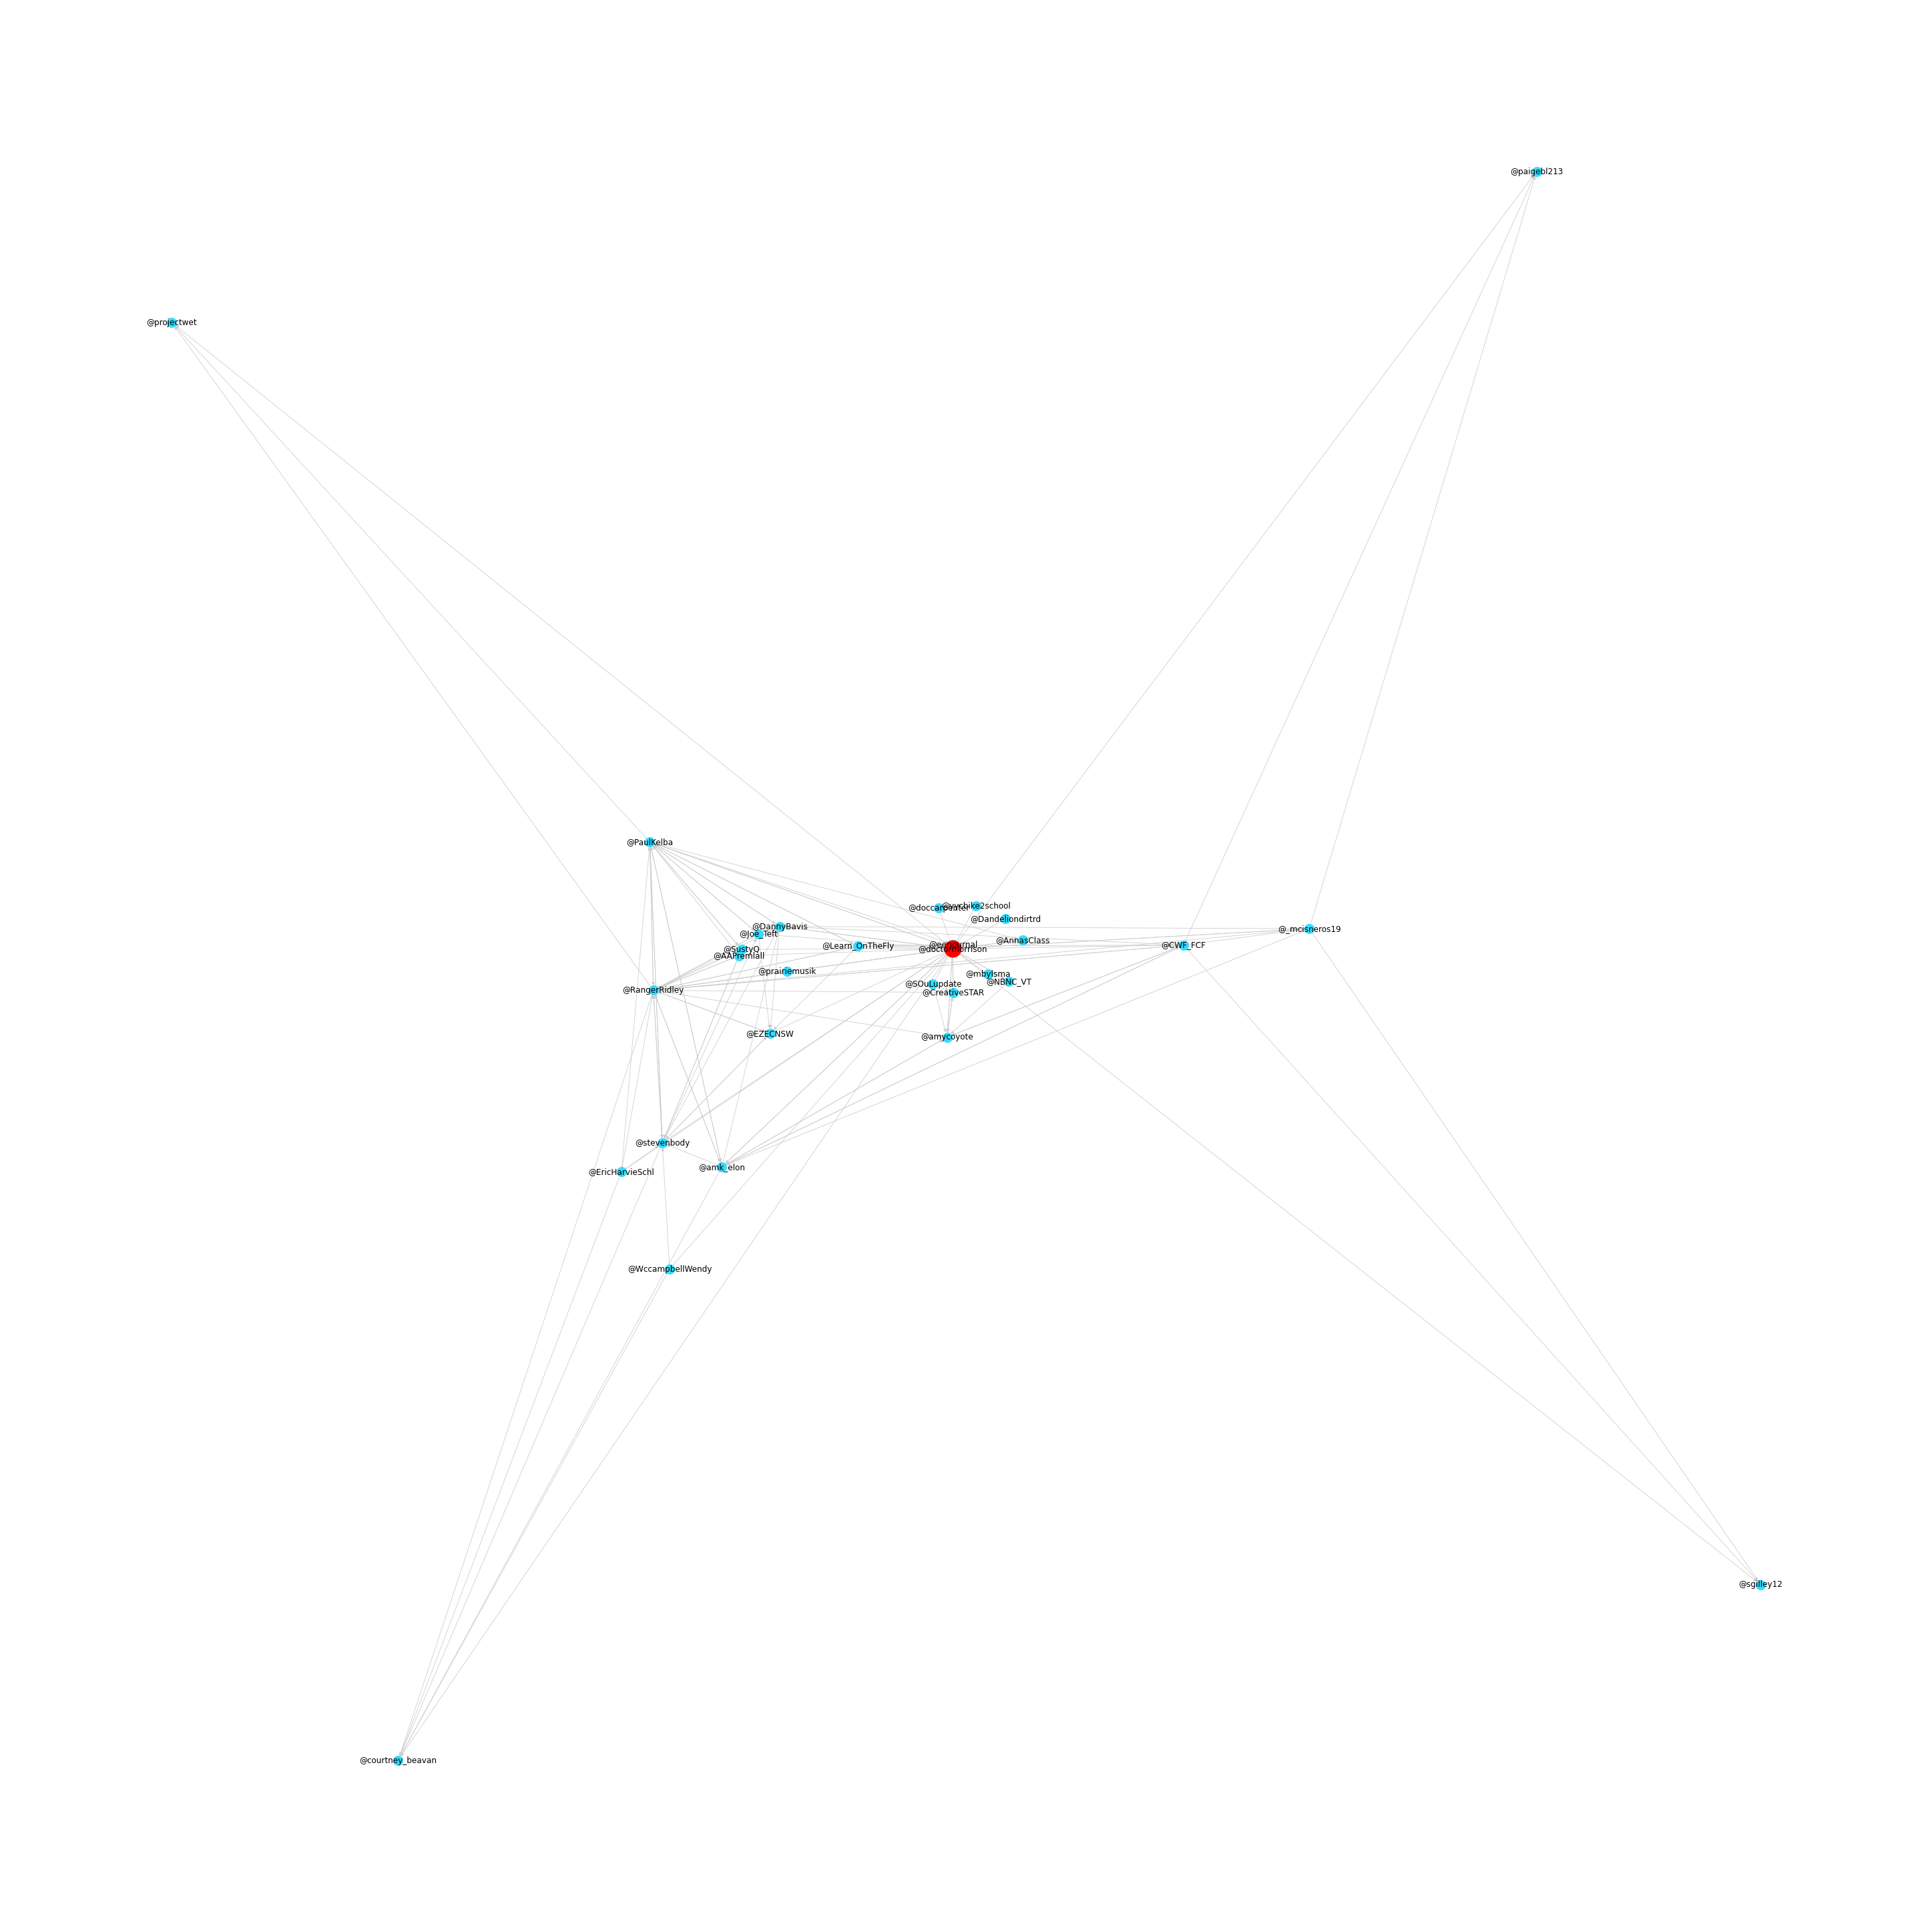

In [ ]:
# We can visualize a network as follows.
# Note that there are lots of parameters to adjust how things look.
plt.figure(figsize=(40, 40))
# Calculate the best position for laying out the nodes graphically.
pos = nx.spring_layout(H, k=0.8) # k controls how far apart nodes are forced to be
nx.draw(H, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=200,
        edge_color='.8', width=0.8)
# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
EU_position = pos['@doctormorrison']
plt.plot(EU_position[0], EU_position[1], 'ro', markersize=25)
plt.show()

In [ ]:
#2ivi 2nd
RR_neighbors = []
RR_neighbors.append('@RangerRidley')

for edge in G.edges():
  if edge[0] == '@RangerRidley':
    RR_neighbors.append(edge[1])
  elif edge[1] == '@RangerRidley':
    RR_neighbors.append(edge[0])

RR_neighbors
H = G.subgraph(RR_neighbors)
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 302
Number of edges: 1035
Average in degree:   3.4272
Average out degree:   3.4272


In [ ]:
G.nodes('@RangerRidley')

NodeDataView({'@': None, 'b': None, 'r': None, 'i': None, 'a': None, 'n': None, 'e': None, '_': None, 'y': None, 'v': None, 'o': None, '@_Lightscap3s_': None, '@NatureBridge': None, '@_Lindsay_Conway': None, '@savageducates': None, '@_mcisneros19': None, '@doctormorrison': None, '@amk_elon': None, '@DannyBavis': None, '@paigebl213': None, '@sgilley12': None, '@_swatik_': None, '@EnviroEducators': None, '@_withah': None, '@ItsAboutTimeEDU': None, '@02Benson': None, '@COrgbon': None, '@GreeningForward': None, '@109ThornKs': None, '@RangerRidley': None, '@1915Aurora': None, '@ArmeniaTree': None, '@CivilNetTV': None, '@JasonSohigian': None, '@1GratefulWorld': None, '@CNC90': None, '@fatim_to': None, '@MrsEimers': None, '@OLVPrincipal': None, '@1stof7gens': None, '@AlbertaEE': None, '@cgeducation': None, '@GEOEC': None, '@RachelNotley': None, '@2015_Project': None, '@22C0in': None, '@EPA': None, '@2LisaMayer': None, '@actionbonnie': None, '@2teacherstshirt': None, '@3PennyMovies': None, '@S

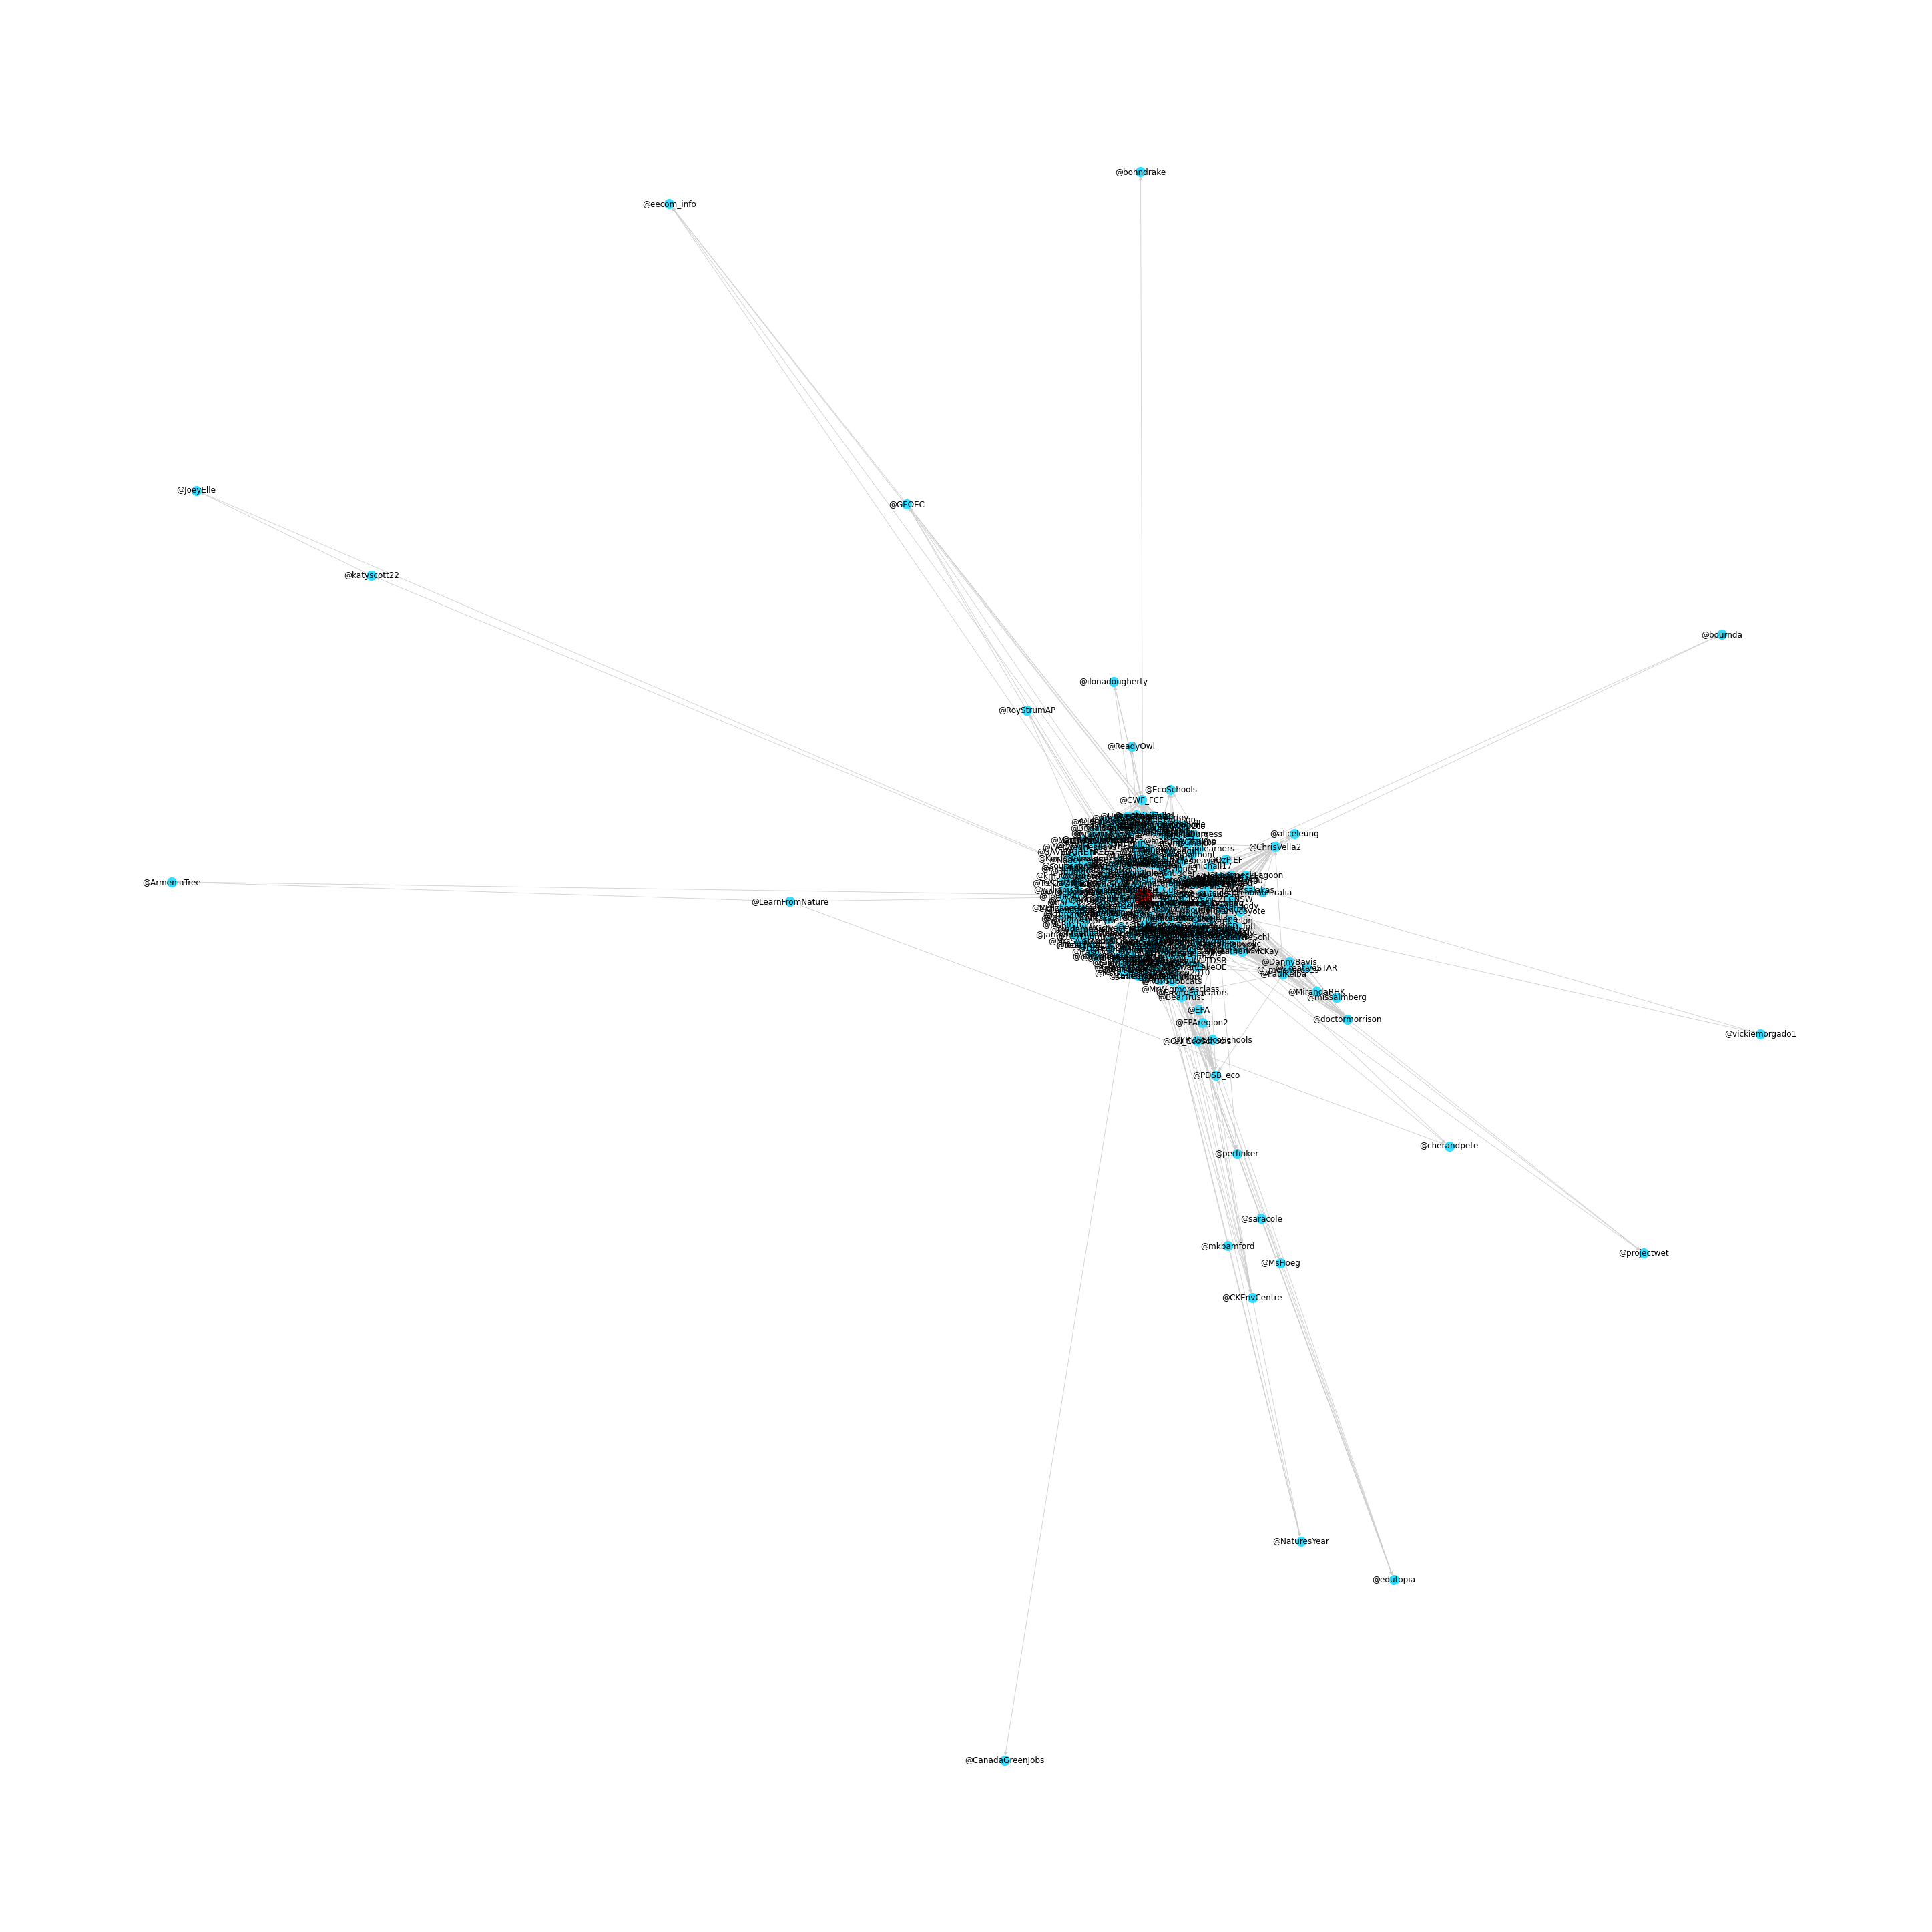

In [ ]:
# We can visualize a network as follows.
# Note that there are lots of parameters to adjust how things look.
plt.figure(figsize=(40, 40))
# Calculate the best position for laying out the nodes graphically.
pos = nx.spring_layout(H, k=0.8) # k controls how far apart nodes are forced to be
nx.draw(H, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=200,
        edge_color='.8', width=0.8)
# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
EU_position = pos['@RangerRidley']
plt.plot(EU_position[0], EU_position[1], 'ro', markersize=25)
plt.show()

In [ ]:
#2ivi 3rd
AEE_neighbors = []
AEE_neighbors.append('@AlbertaEE')

for edge in G.edges():
  if edge[0] == '@AlbertaEE':
    AEE_neighbors.append(edge[1])
  elif edge[1] == '@AlbertaEE':
    AEE_neighbors.append(edge[0])

AEE_neighbors
H = G.subgraph(AEE_neighbors)
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 40
Number of edges: 140
Average in degree:   3.5000
Average out degree:   3.5000


In [ ]:
G.nodes('@AlbertaEE')

NodeDataView({'@': None, 'b': None, 'r': None, 'i': None, 'a': None, 'n': None, 'e': None, '_': None, 'y': None, 'v': None, 'o': None, '@_Lightscap3s_': None, '@NatureBridge': None, '@_Lindsay_Conway': None, '@savageducates': None, '@_mcisneros19': None, '@doctormorrison': None, '@amk_elon': None, '@DannyBavis': None, '@paigebl213': None, '@sgilley12': None, '@_swatik_': None, '@EnviroEducators': None, '@_withah': None, '@ItsAboutTimeEDU': None, '@02Benson': None, '@COrgbon': None, '@GreeningForward': None, '@109ThornKs': None, '@RangerRidley': None, '@1915Aurora': None, '@ArmeniaTree': None, '@CivilNetTV': None, '@JasonSohigian': None, '@1GratefulWorld': None, '@CNC90': None, '@fatim_to': None, '@MrsEimers': None, '@OLVPrincipal': None, '@1stof7gens': None, '@AlbertaEE': None, '@cgeducation': None, '@GEOEC': None, '@RachelNotley': None, '@2015_Project': None, '@22C0in': None, '@EPA': None, '@2LisaMayer': None, '@actionbonnie': None, '@2teacherstshirt': None, '@3PennyMovies': None, '@S

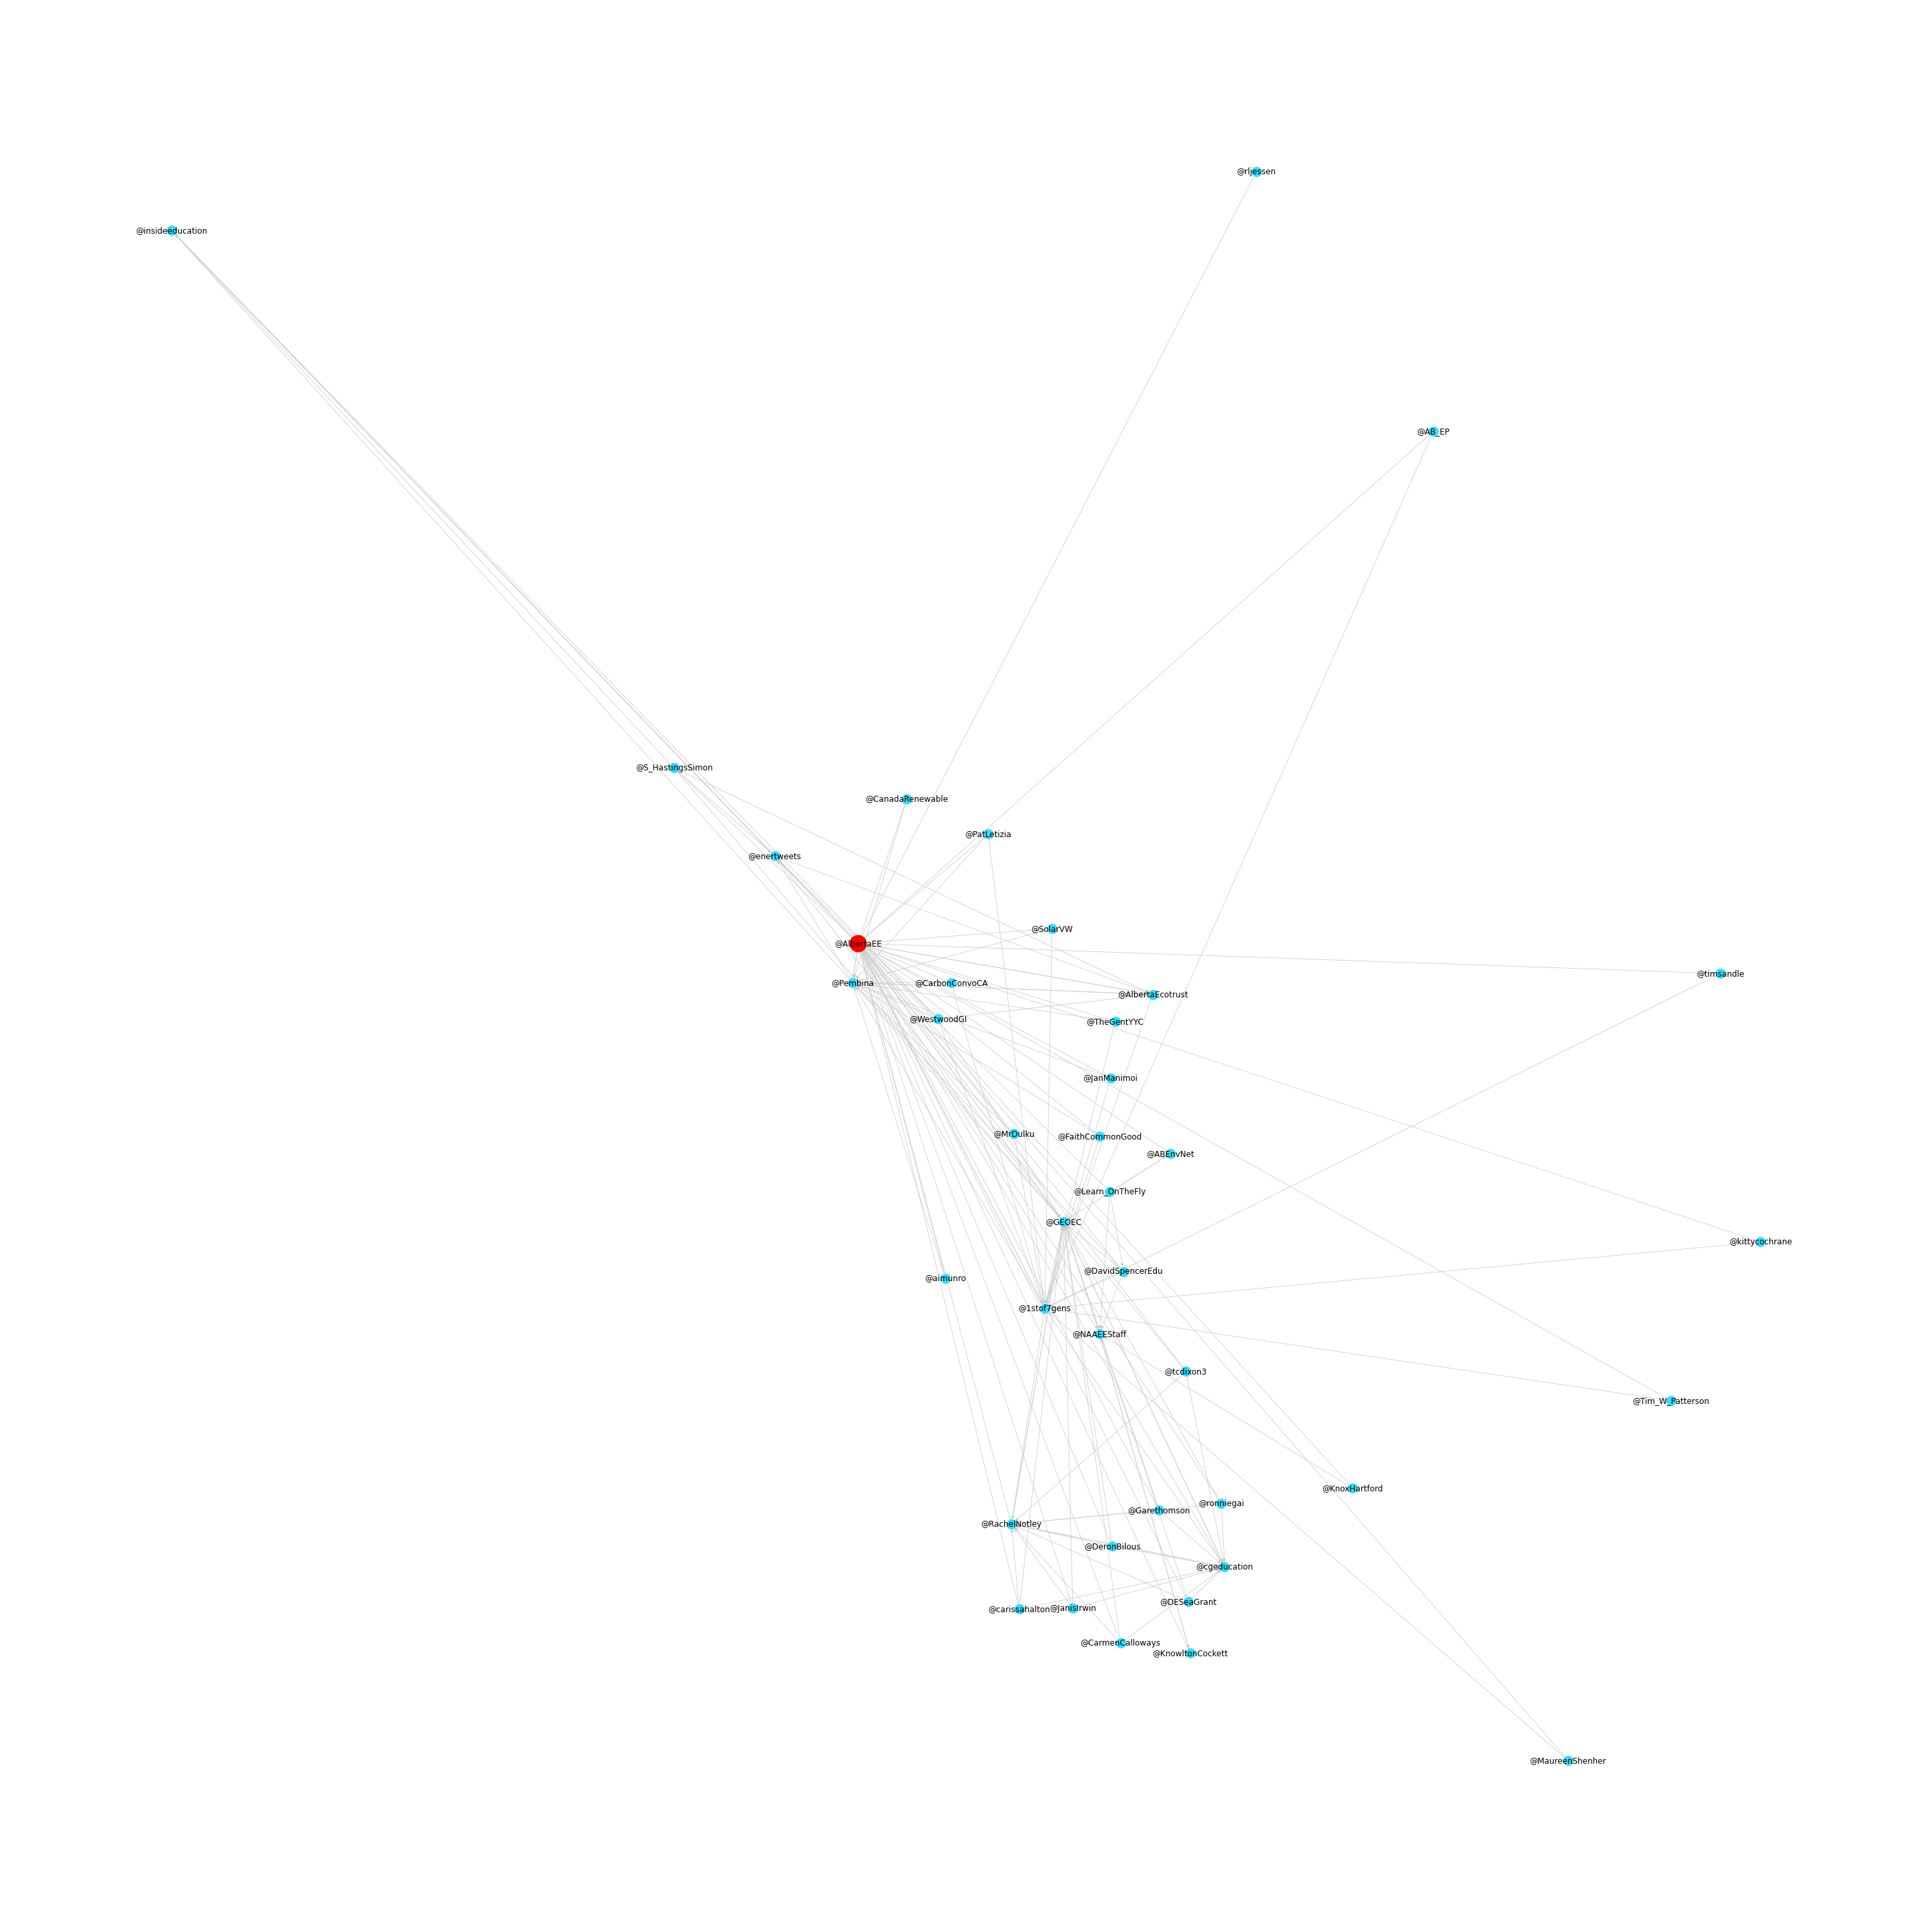

In [ ]:
# We can visualize a network as follows.
# Note that there are lots of parameters to adjust how things look.
plt.figure(figsize=(40, 40))
# Calculate the best position for laying out the nodes graphically.
pos = nx.spring_layout(H, k=0.8) # k controls how far apart nodes are forced to be
nx.draw(H, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=200,
        edge_color='.8', width=0.8)
# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
EU_position = pos['@AlbertaEE']
plt.plot(EU_position[0], EU_position[1], 'ro', markersize=25)
plt.show()

#2ivii
As can be seen from the grpahs above, @RangerRidley has by far the most connections. This makes sense and is consistent with oouor calculated metrics, where @RangerRidley topped all of the categories. For the third graph, we chose the person with the 20th highest betweenness centrality. Since @AlbertaEE's betweenness was high, but not like @RangerRidley's, her graph was much calmer and easier to look at.

In [ ]:
#2b: How well can our model predict the amount of followers a person has based on some of the columns?
df=df.rename(columns={'User Since':'user_since'})
df = df.fillna(0)
df.Follows.astype(int)
#df = df[~(df['Follows'] >= 0)]
df['user_since'] =  pd.to_datetime(df['user_since'], format='%m/%d/%y')
df['year'] = df['user_since'].dt.year
df['int_follows'] = df['Follows'].astype(int)
df.dropna()
X=df[["int_follows","Retweets","Favorites"]]
X

,int_follows,Retweets,Favorites
0,590,1,0
1,587,2,0
2,318,2,0
3,44,0,0
4,44,0,0
...,...,...,...
5509,106,10,0
5510,7916,18,0
5511,138,1,0
5512,1801,0,0


In [ ]:
y=df.Followers
y

0        2644
1        2641
2         164
3           8
4           8
        ...  
5509      331
5510     9786
5511       46
5512    12283
5513      125
Name: Followers, Length: 5514, dtype: int64

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (4411, 3)
ytrain.shape: (4411,)
Xtest.shape: (1103, 3)
ytest.shape: (1103,)


In [ ]:
model=KNeighborsClassifier(n_neighbors=30,metric="manhattan")
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
ypred=model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
print(classification_report(ytest, ypred))

#2j We were interested in using the KNN model to try to predict how many followers a user would have based on the amount of people they follow, the amount of people who retweeted their tweets, the year they joined, and how many people have them as favorites. When running the model, it took about 20 minutes, and the confusion matrix did not look like it usually looks. We attempted to get dummies, but that made way to many columns. We also attempted using .values to try something different, but our model just is not working the way we envisioned it would. At the bottom of the classification report, our model still predict how many followers a person has with 23% accuracy. This is not the best accuracy, however considering the amount of data, a 23% accuracy is not terrible. 

In [ ]:
#2b continued:
followers_cut = pd.qcut(df.Followers, [0, .33, .66, 1], labels=["Not Famous", "Average", "Famous"])
followers_cut
apps_cut = pd.qcut(df.Apps.count, [0, .33, .66, 1], labels=["Low-key Apps", "Average Apps", "Famous Apps"])
apps_cut
top10Apps = df.App.value_counts()[:10]
bar = pd.crosstab(df.App, df.Followers,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Apps and Followers')
plt.xlabel('Apps')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: ignored

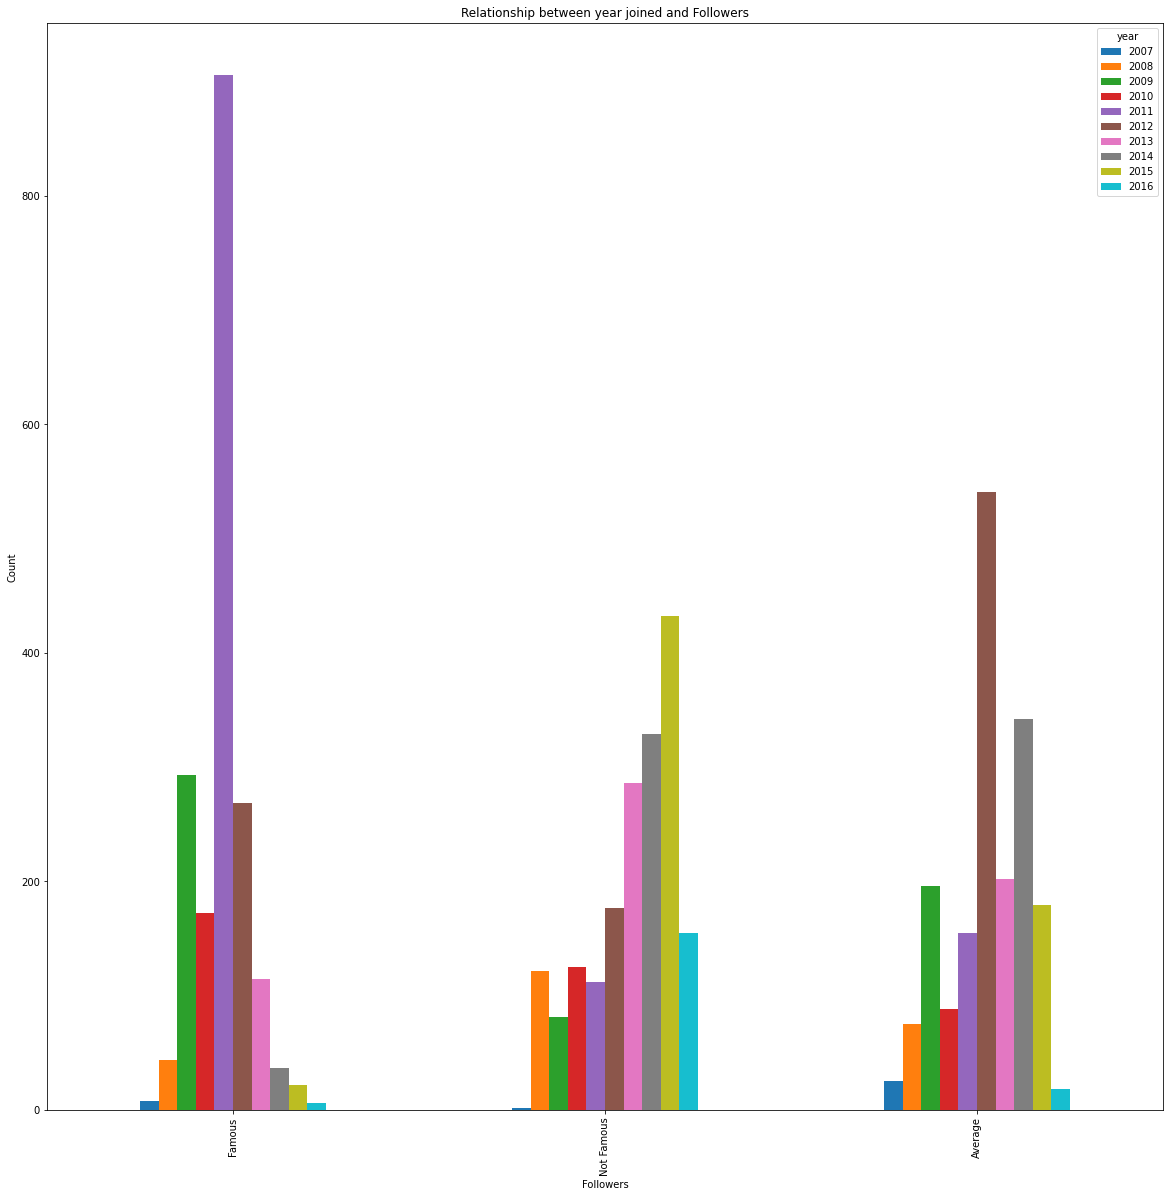

In [ ]:
followers_cut = pd.qcut(df.Followers, [0, .33, .66, 1], labels=["Not Famous", "Average", "Famous"])
followers_cut
bar = pd.crosstab(followers_cut, df.year,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False,figsize=(20,20))
plt.title('Relationship between year joined and Followers')
plt.xlabel('Followers')
plt.ylabel('Count')
plt.show()

#2b continued interpretation. 
Since our initial interesting question did not work out the way we wanted it to, we decided to go for a second graph. The graph above depics the relationship between the year the person joined and how many followers they have. In 2007, there were the least amount of people on Twitter, which makes sense since it was very early. In 2011, we see most famous people created their Twitter accounts. The below average number of followers however, created their profiles very recently in 2015, which also makes sense. In 2012, most average people created their accounts, which one of the more middle years in our dataset.